### Salman Rashid K V - DSML December Batch

## Business Case: Walmart - Confidence Interval and CLT

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against 
the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

### Problem Statement
- Study the data set for data cleaning and preprocessing
- Detect outliers in the data set using boxplot and describe function
- Understand the distribution of data for the quantitative attributes
- Understand correlations of data among the quantitative attributes
- Univariate, bivariate & multivariate analysis to check relationship between different features
- Peform the Central limit theorem to compute different confidence intervals (90%, 95%, 99%)
- Track the amount spent by customers per purchase to both 50 million male  & female customers
- Change the sample size to observe the distribution of the mean of the expenses

### Data Information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot
import missingno as msno
from sklearn.utils import resample

In [2]:
df=pd.read_csv('walmart_data.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


**Data set**
- User_ID : User ID
- Product_ID : Product ID
- Gender : Sex of User
- Age : Age in bins
- Occupation : Occupation (Masked)
- City_Category : Category of the City (A,B,C)
- Stay_In_Current_City_Years : Number of years stay in current city
- Marital_Status : Marital Status
- Product_Category : Product Category (Masked)
- Purchase : Purchase Amount

In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [7]:
for i in df.columns:
    print(i,':',df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [8]:
for i in df.columns:
    print(i,':\n',df[i].unique())

User_ID :
 [1000001 1000002 1000003 ... 1004113 1005391 1001529]
Product_ID :
 ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender :
 ['F' 'M']
Age :
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation :
 [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category :
 ['A' 'C' 'B']
Stay_In_Current_City_Years :
 ['2' '4+' '3' '1' '0']
Marital_Status :
 [0 1]
Product_Category :
 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Purchase :
 [ 8370 15200  1422 ...   135   123   613]


In [9]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

C:\Users\rrosh\anaconda\lib\site-packages\scipy\cluster\hierarchy.py:2846: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([dvw, 0])


<AxesSubplot:>

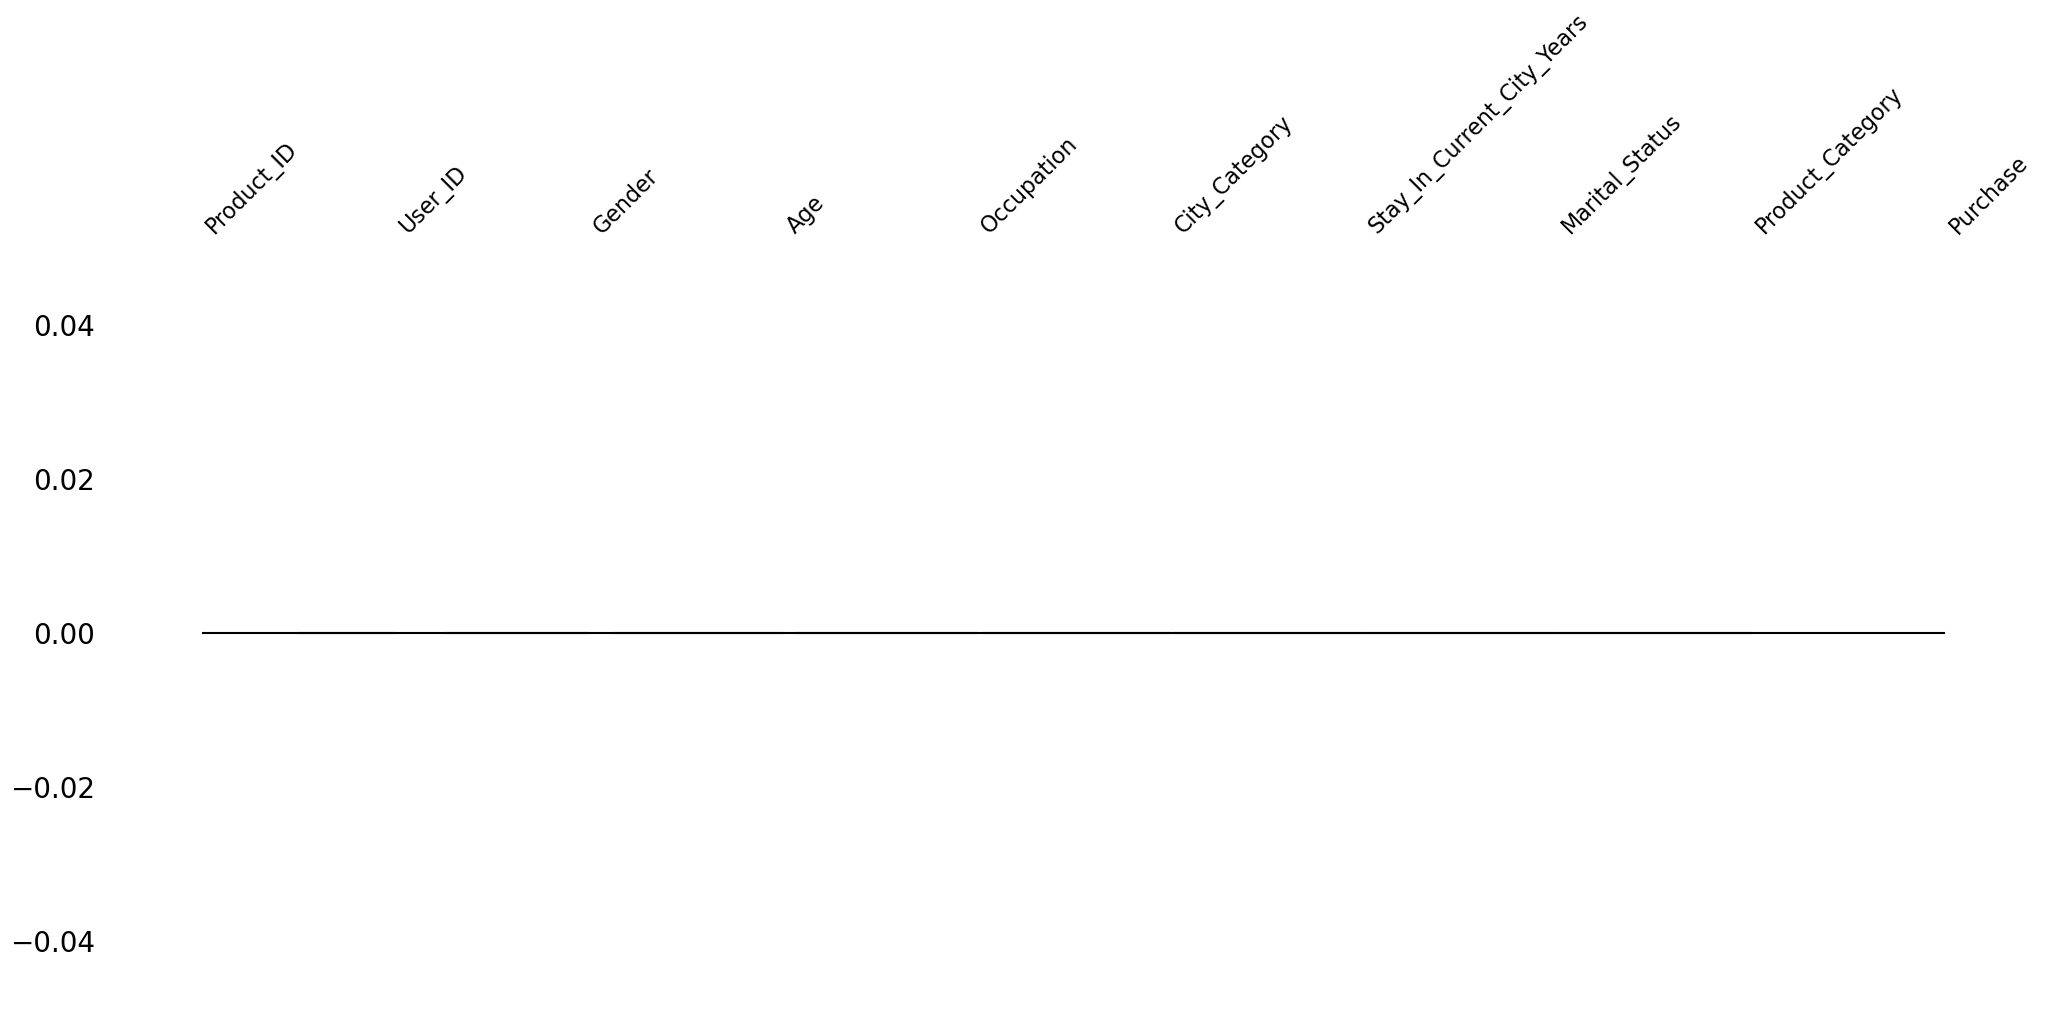

In [10]:
msno.dendrogram(df)

**There is zero occurence of null values in columns inside the dataframe.**

In [127]:
df.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,2,NaN,NaN
top,NaN,P00265242,Male,26-35,NaN,B,1,Unmarried,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,324731,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,NaN,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,NaN,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,8.000000,12054.000000


**The mean and median value of the Purchase column shows large difference. So, we need to find outliers occuring among the
purchase amount.**

In [12]:
df['Gender'].replace({'M':'Male', 'F':'Female'},inplace=True)
df['Marital_Status'].replace({0:'Unmarried', 1:'Married'},inplace=True)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,Male,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,Male,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,Male,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,Male,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,Male,26-35,20,A,1,Married,8,7871


In [163]:
df1=df.copy()

In [164]:
df1['Gender'].replace({'M':'Male', 'F':'Female'},inplace=True)
df1['Marital_Status'].replace({0:'Unmarried', 1:'Married'},inplace=True)
df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].str.replace("+","").astype('int')

C:\Users\rrosh\AppData\Local\Temp\ipykernel_3996\567786563.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1['Stay_In_Current_City_Years']=df1['Stay_In_Current_City_Years'].str.replace("+","").astype('int')


## Outlier Detection

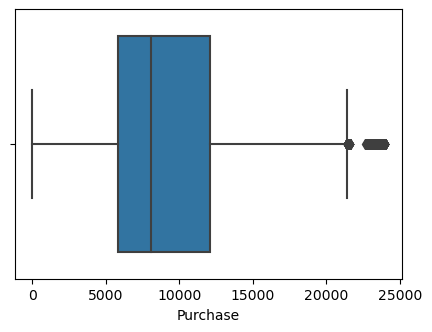

In [15]:
plt.figure(figsize=(5,3.5))
sns.boxplot(x ='Purchase', data = df1)
plt.show()

In [16]:
q1=df1['Purchase'].quantile(0.25)
q3=df1['Purchase'].quantile(0.75)
print('The first quantile is',q1)
print('The third quantile is',q3)

The first quantile is 5823.0
The third quantile is 12054.0


In [17]:
iqr=q3 - q1
print(iqr)

6231.0


**Inter Quartile Range = 6231**

In [18]:
lower = q1-(1.5)*iqr
upper = q3+(1.5)*iqr
print('The lower limit for outliers are',lower)
print('The upper limit for outliers are',upper)

The lower limit for outliers are -3523.5
The upper limit for outliers are 21400.5


In [19]:
outlier = df1[(df1['Purchase']<lower)|(df1['Purchase']>upper)]
outlier.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,Male,26-35,2,B,3,Unmarried,10,23603
375,1000062,P00119342,Female,36-45,3,A,1,Unmarried,10,23792
652,1000126,P00087042,Male,18-25,9,B,1,Unmarried,10,23233
736,1000139,P00159542,Female,26-35,20,C,2,Unmarried,10,23595
1041,1000175,P00052842,Female,26-35,2,B,1,Unmarried,10,23341
1445,1000235,P00116142,Male,26-35,0,B,0,Unmarried,10,23826
1902,1000304,P00273342,Male,26-35,0,B,1,Unmarried,10,23139
3166,1000523,P00117642,Male,51-55,7,A,1,Married,10,23159
3167,1000523,P00200642,Male,51-55,7,A,1,Married,10,23741
3172,1000524,P00346542,Male,18-25,0,A,0,Unmarried,10,23728


**There are 2677 outlayer values inside the purchase column.**

### Dataframe after removing the outlier values

In [20]:
purchase = df1[~((df1['Purchase']<lower)|(df1['Purchase']>upper))]
purchase.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,Female,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,Female,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,Female,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,Male,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,Male,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,Male,46-50,7,B,2,Married,1,15854
8,1000004,P0097242,Male,46-50,7,B,2,Married,1,15686
9,1000005,P00274942,Male,26-35,20,A,1,Married,8,7871


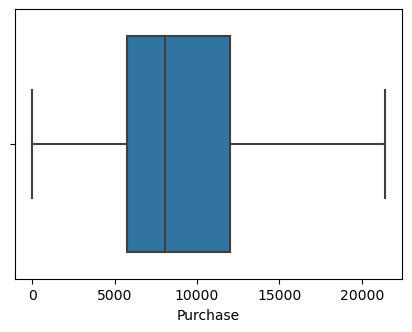

In [21]:
plt.figure(figsize=(5,3.5))
sns.boxplot(x ='Purchase', data = purchase)
plt.show()

## Distribution of Quantitative data

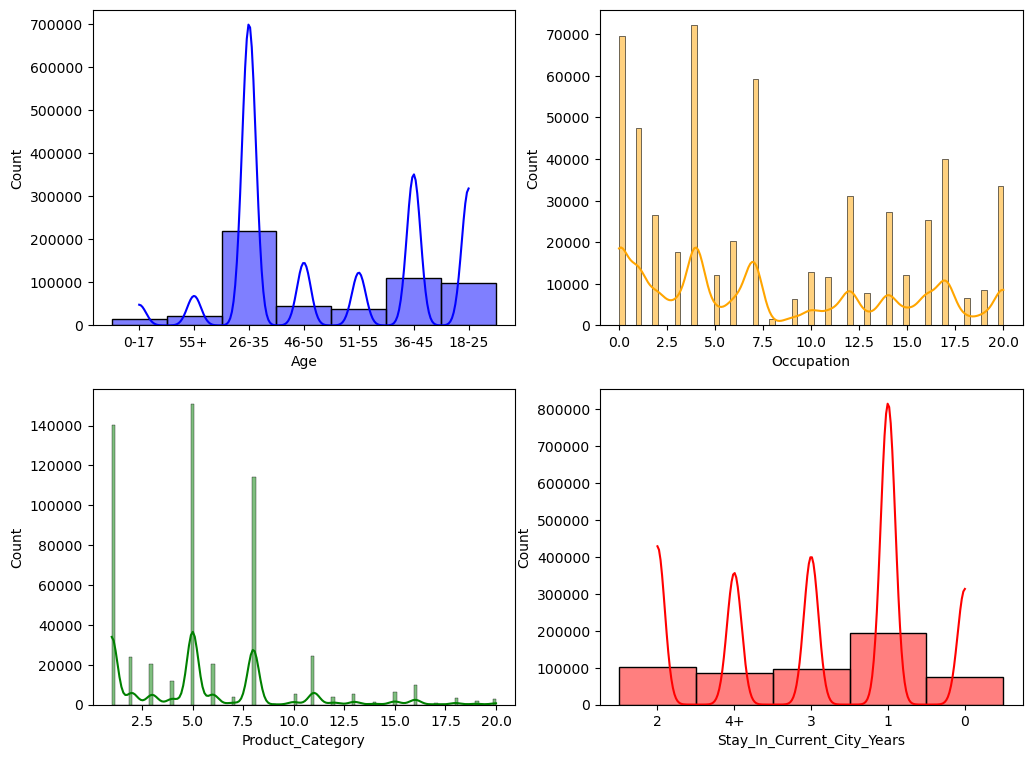

In [22]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
fig.subplots_adjust(top=1.5)
sns.histplot(data=df, x="Age", kde=True,color="blue", ax=axis[0,0])
sns.histplot(data=df, x="Occupation", kde=True,color="orange", ax=axis[0,1])
sns.histplot(data=df, x="Product_Category", kde=True,color="green", ax=axis[1,0])
sns.histplot(data=df, x="Stay_In_Current_City_Years", kde=True,color="red", ax=axis[1,1])
plt.show()

- **Most customers are of the age group between 26 and 35**
- **There are 20 different types of Occupation and Product_Category**
- **There are 3 peaks occuring in Occupation and Product_Category**
- **Most customers stay one year in their current city**


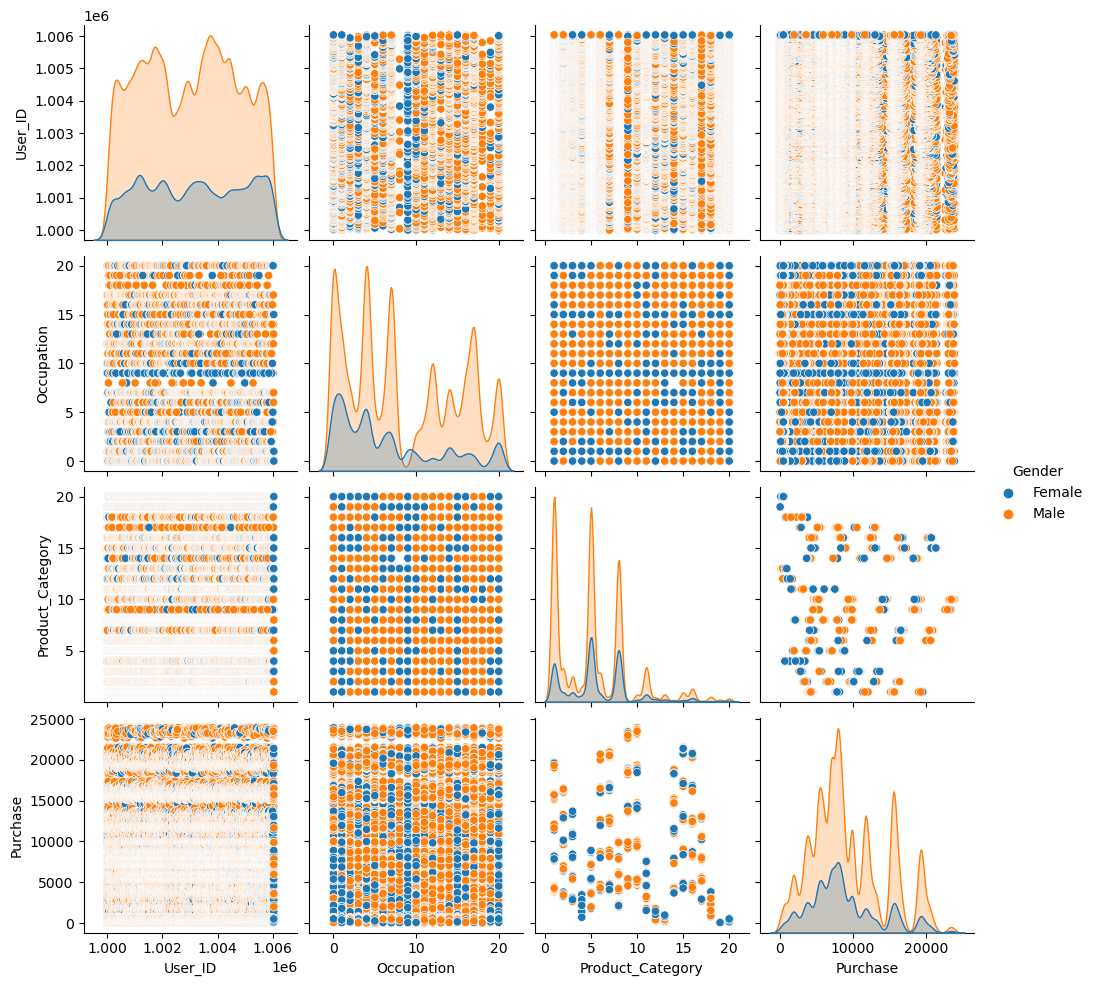

In [23]:
sns.pairplot(df1,hue='Gender')
plt.show()

## Correlation of data

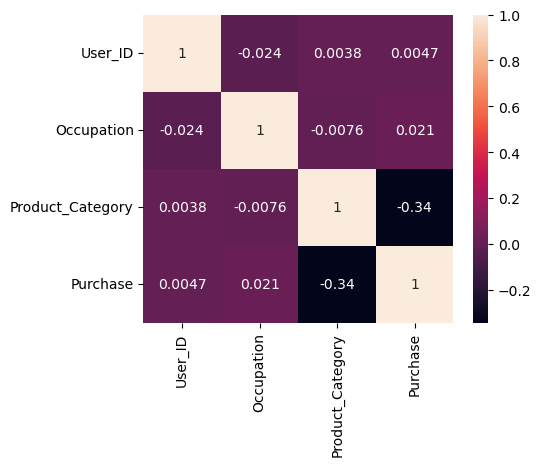

In [24]:
plt.figure(figsize=(5,4))
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Data Visualization

### Univariate Analysis

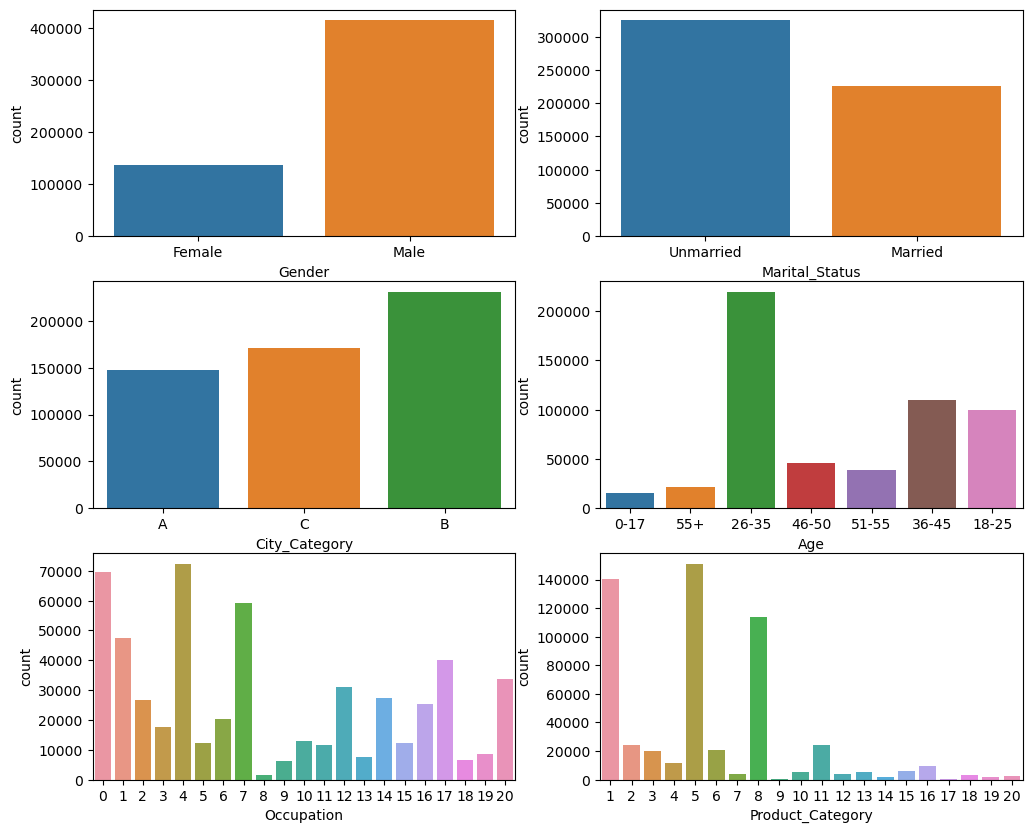

In [25]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Age', ax=axs[1,1])
sns.countplot(data=df, x='Occupation', ax=axs[2,0])
sns.countplot(data=df, x='Product_Category',ax=axs[2,1])

plt.show()

- **Most of the users are Male**
- **More users are Single as compare to Married**
- **More users belong to B City_Category**
- **Most customers are of the age group between 26 and 35**
- **Product_Category - 1, 5 & 8 have highest purchasing frequency**
- **There are 20 different types of Occupation and Product_Category**

### Bivariate Analysis

Text(0.5, 1.0, 'Gender vs City Category')

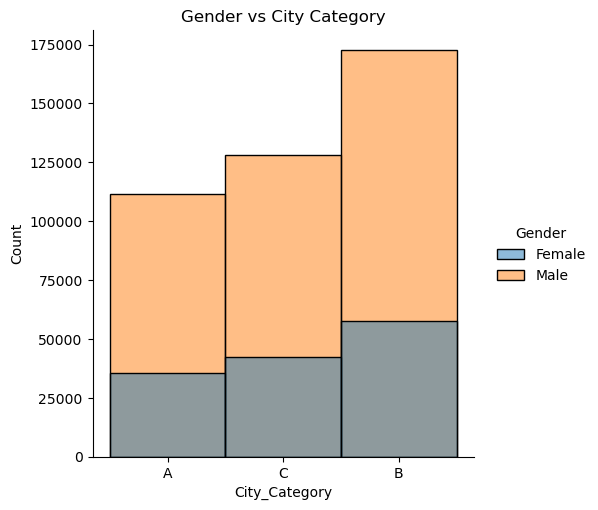

In [176]:
sns.displot(data=purchase, x='City_Category',hue='Gender')
plt.title('Gender vs City Category')

**Male customers are higher compared to female customers for walmart, across the city categories**

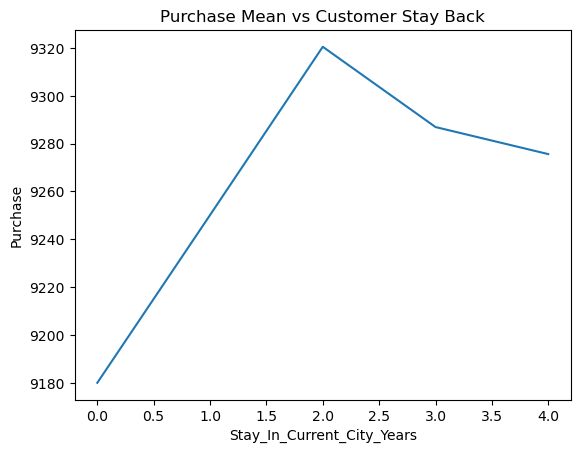

In [177]:
sp=df1.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()
sns.lineplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', data = sp)
plt.title('Purchase Mean vs Customer Stay Back')
plt.show()

Text(0.5, 1.0, 'Purchase Amount vs Gender')

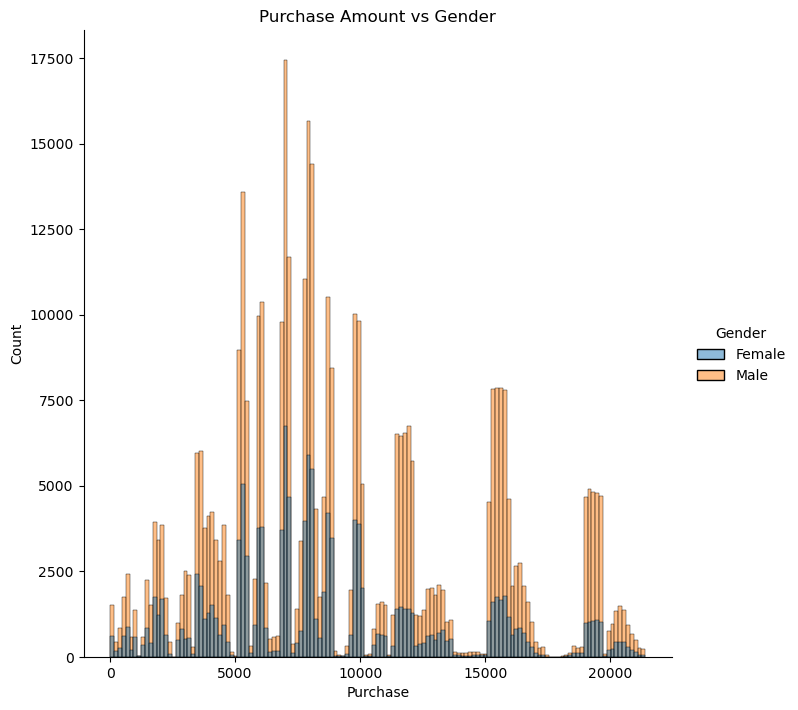

In [184]:
sns.displot(data=purchase, x='Purchase',hue='Gender',height=7)
plt.title('Purchase Amount vs Gender')

**Most of the customers, both male and female, has spent purchase amount between the range 5k to 10k**

### Multivariate Analysis

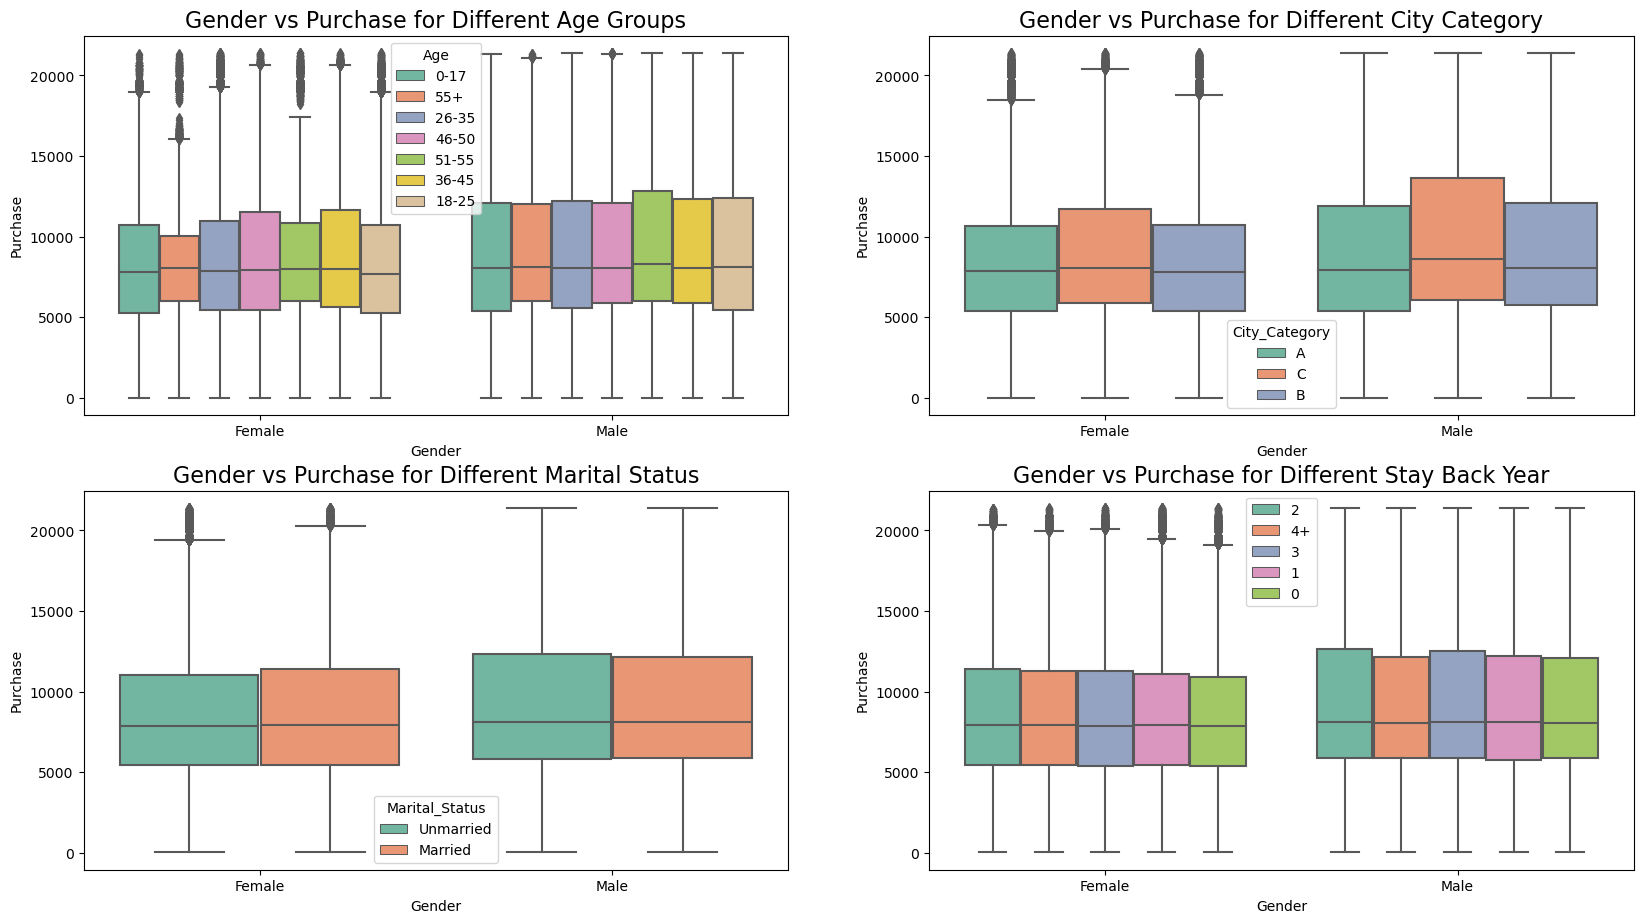

In [26]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(20, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=purchase, y='Purchase', x='Gender', hue='Age', palette='Set2', ax=axis[0,0])
sns.boxplot(data=purchase, y='Purchase', x='Gender', hue='City_Category', palette='Set2', ax=axis[0,1])
sns.boxplot(data=purchase, y='Purchase', x='Gender', hue='Marital_Status', palette='Set2', ax=axis[1,0])
sns.boxplot(data=purchase, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', palette='Set2', ax=axis[1,1])
axis[1,1].legend(loc='upper center')

axis[0,0].set_title("Gender vs Purchase for Different Age Groups",fontsize=16)
axis[0,1].set_title("Gender vs Purchase for Different City Category", fontsize=16)
axis[1,0].set_title("Gender vs Purchase for Different Marital Status", fontsize=16)
axis[1,1].set_title("Gender vs Purchase for Different Stay Back Year", fontsize=16)

plt.show()

- **In each cases, the male customers have higher purchase amount compared to female customers**
- **City category C has higher purchases for both male and female customers**
- **Married female customers has spent more amount, whereas for male unmarried customers has spent more**

###  Number of products in each product category

In [27]:
product_per_category=df.groupby('Product_Category')['Product_ID'].count().to_frame('Product Count').reset_index()
product_per_category

,Product_Category,Product Count
0,1,140378
1,2,23864
2,3,20213
3,4,11753
4,5,150933
5,6,20466
6,7,3721
7,8,113925
8,9,410
9,10,5125


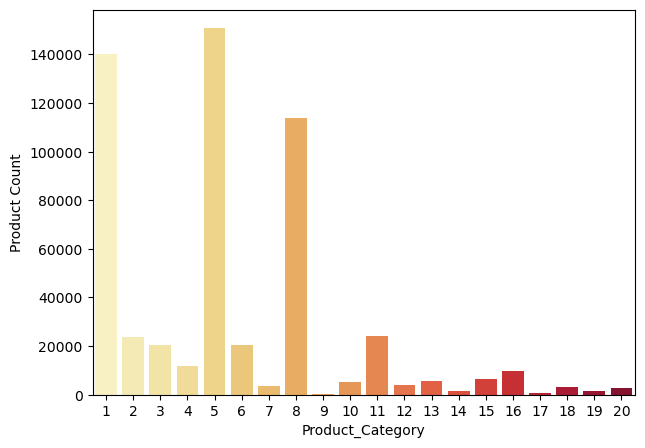

In [28]:
plt.figure(figsize=(7,5))
sns.barplot(data=product_per_category, x='Product_Category',y='Product Count',palette='YlOrRd')
plt.show()

**Product category 1, 5 and 8 has the most number of products**

### Number of products from each product category based on gender of the customers

In [29]:
purchased_product_gender=df.groupby('Gender')['Product_Category'].value_counts().to_frame('Product Count').reset_index()
purchased_product_gender.head(10)

,Gender,Product_Category,Product Count
0,Female,5,41961
1,Female,8,33558
2,Female,1,24831
3,Female,3,6006
4,Female,2,5658
5,Female,11,4739
6,Female,6,4559
7,Female,4,3639
8,Female,16,2402
9,Female,12,1532


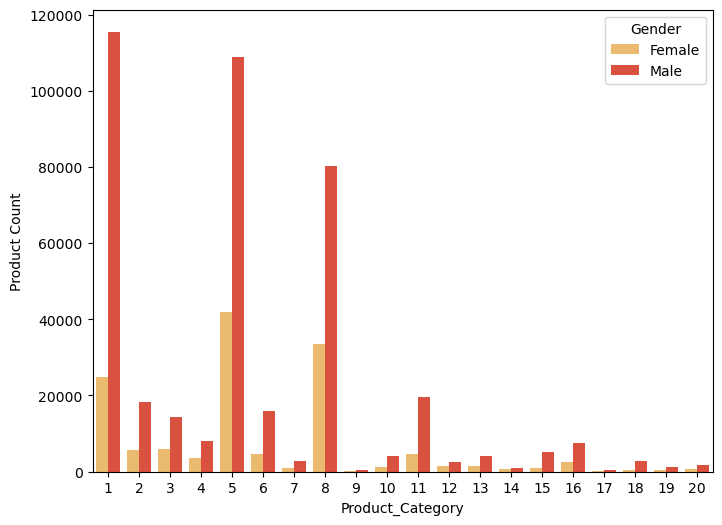

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data = purchased_product_gender, x = 'Product_Category', y = 'Product Count', hue = 'Gender',palette='YlOrRd')
plt.show()

- **Both female and male customers preferred products from product category 1, 5 and 8**
- **For female customers, top 3 purchasing product category are in the order 5, 8 and 1**
- **9 is the least purchasing product category for both males and females**

### Number of products from each product category based on marital status of the customers

In [31]:
purchased_product_ms=df.groupby('Marital_Status')['Product_Category'].value_counts().to_frame('Product Count').reset_index()
purchased_product_ms.head(10)

,Marital_Status,Product_Category,Product Count
0,Married,5,61277
1,Married,1,56003
2,Married,8,48514
3,Married,2,9726
4,Married,11,9619
5,Married,6,8327
6,Married,3,7854
7,Married,4,4576
8,Married,16,4115
9,Married,15,2667


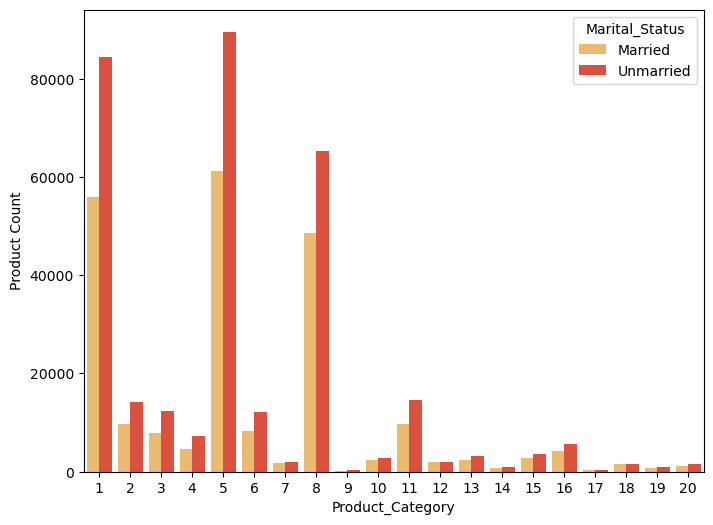

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(data = purchased_product_ms, x = 'Product_Category', y = 'Product Count', hue = 'Marital_Status',palette='YlOrRd')
plt.show()

- **Both married and unmarried customers preferred products from product category 1, 5 and 8**
- **For unmarried customers, top 3 purchasing product category are in the order 5, 1 and 8**
- **For married customers, top 3 purchasing product category are in order 5, 1 and 8**
- **9 is the least purchasing product category for both married and unmarried**

### Top 5 purchased product category by the customers

In [33]:
top_purchased_product=df.Product_Category.value_counts().to_frame('Count').reset_index()
top_purchased_product.head()

,index,Count
0,5,150933
1,1,140378
2,8,113925
3,11,24287
4,2,23864


In [34]:
top_purchased_product=purchase[(purchase['Product_Category']==5)|(purchase['Product_Category']==1)|(purchase['Product_Category']==8)|(purchase['Product_Category']==11)|(purchase['Product_Category']==2)]
top_purchased_product

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
1,1000001,P00248942,Female,0-17,10,A,2,Unmarried,1,15200
4,1000002,P00285442,Male,55+,16,C,4+,Unmarried,8,7969
5,1000003,P00193542,Male,26-35,15,A,3,Unmarried,1,15227
6,1000004,P00184942,Male,46-50,7,B,2,Married,1,19215
7,1000004,P00346142,Male,46-50,7,B,2,Married,1,15854
...,...,...,...,...,...,...,...,...,...,...
545910,1006040,P00184342,Male,26-35,6,B,2,Unmarried,8,9855
545911,1006040,P00193142,Male,26-35,6,B,2,Unmarried,5,1962
545912,1006040,P00029842,Male,26-35,6,B,2,Unmarried,8,7852
545913,1006040,P00106042,Male,26-35,6,B,2,Unmarried,5,7159


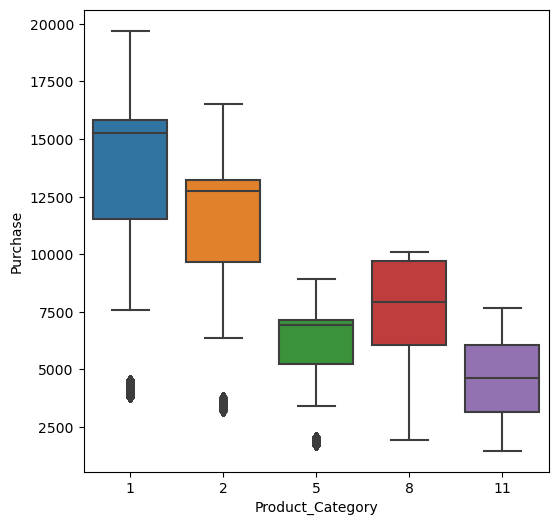

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(data = top_purchased_product,x = 'Product_Category', y = 'Purchase')
plt.show()

**Products from the product category 1, 2, 5, 8 & 11 are most popular among customers**

### Purchase mean for each gender in different product category

In [36]:
x=purchase.groupby(['Product_Category','Gender'])['Purchase'].mean().reset_index()
x.head(10)

,Product_Category,Gender,Purchase
0,1,Female,13597.162619
1,1,Male,13608.164721
2,2,Female,11407.496819
3,2,Male,11203.590520
4,3,Female,10262.656677
5,3,Male,10026.550081
6,4,Female,2454.851882
7,4,Male,2273.512694
8,5,Female,6307.239532
9,5,Male,6214.230729


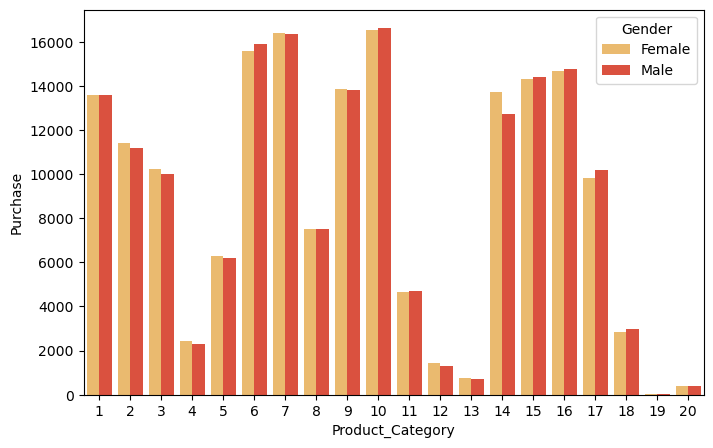

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data = x, x = 'Product_Category', y = 'Purchase', hue = 'Gender',palette='YlOrRd')
plt.show()

- **Top 3 expensive product categories are 10, 7 and 6**
- **Top 3 cheap product categories are 19, 20 and 13**

### Age and purchase analysis

In [141]:
ap=df.groupby('Age')['Purchase'].mean().reset_index()
ap

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


Text(0.5, 1.0, 'Age and Purchase Analyisis')

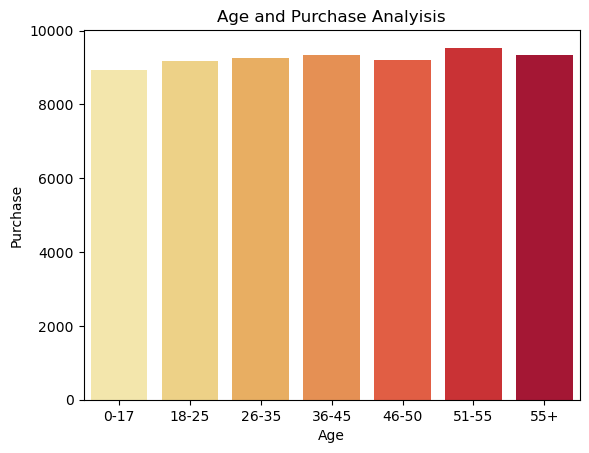

In [144]:
sns.barplot(x="Age", y="Purchase", data=ap, palette='YlOrRd')
plt.title("Age and Purchase Analyisis")

###  Number of customer purchases based on their genders and age group

In [38]:
df.groupby(['Gender','Age'])['Purchase'].count().reset_index()

,Gender,Age,Purchase
0,Female,0-17,5083
1,Female,18-25,24628
2,Female,26-35,50752
3,Female,36-45,27170
4,Female,46-50,13199
5,Female,51-55,9894
6,Female,55+,5083
7,Male,0-17,10019
8,Male,18-25,75032
9,Male,26-35,168835


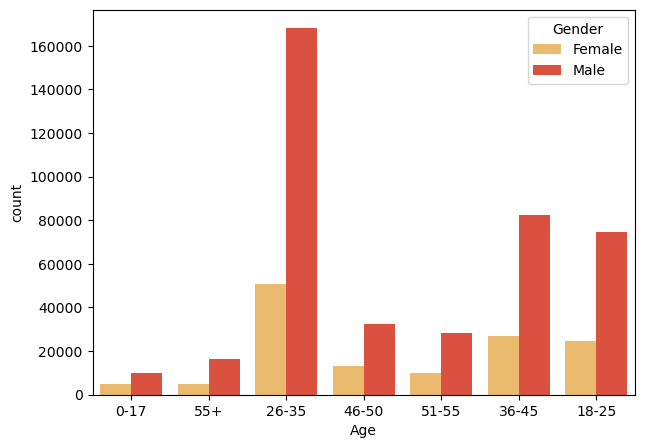

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(data = purchase,x = 'Age',  hue = 'Gender',palette='YlOrRd')
plt.show()

- **Male customers are larger in number than female customer**
- **Customers in the age group between 26 to 35 purchased more products**

### Number of customer purchases based on their genders and age group

In [40]:
df.groupby(['City_Category','Age'])['Purchase'].count().reset_index()

,City_Category,Age,Purchase
0,A,0-17,2544
1,A,18-25,27535
2,A,26-35,73745
3,A,36-45,26617
4,A,46-50,7607
5,A,51-55,6099
6,A,55+,3573
7,B,0-17,5435
8,B,18-25,43247
9,B,26-35,91584


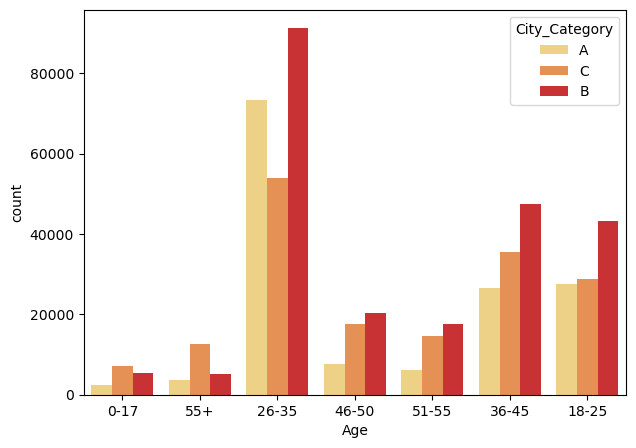

In [41]:
plt.figure(figsize=(7,5))
sns.countplot(data=purchase,x='Age',hue='City_Category',palette='YlOrRd')
plt.show()

- **Most of the customers are belongs to the age group between 26 and 35**
- **Most customers belongs to the city category B**

### Purchase mean by each gender for their stay back in the city

In [174]:
sp=df1.groupby(['Stay_In_Current_City_Years','Gender'])['Purchase'].mean().reset_index()

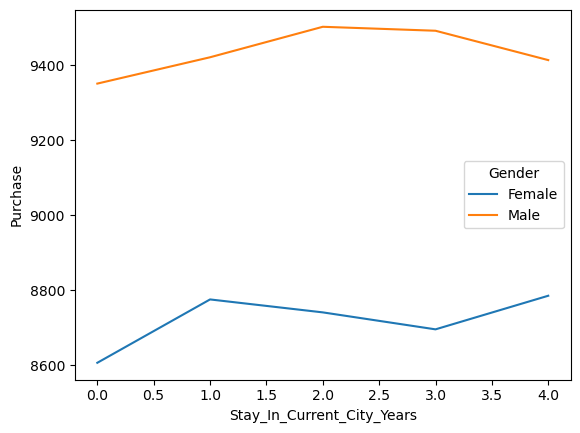

In [175]:
sns.lineplot(x = 'Stay_In_Current_City_Years', y= 'Purchase', data = sp,hue='Gender')
plt.show()

**Purchase mean of both male and female customers increases along with their stay in current city**

### Total purchase amount spent by the customers

In [42]:
total_amount=df1.groupby(['City_Category','User_ID'])['Purchase'].sum().to_frame('Total_Amount').reset_index().sort_values(by='Total_Amount',ascending=False)
total_amount.Total_Amount=total_amount.Total_Amount/100000
total_amount

,City_Category,User_ID,Total_Amount
736,A,1004277,105.36909
327,A,1001680,86.99596
509,A,1002909,75.77756
362,A,1001941,68.17493
95,A,1000424,65.73609
...,...,...,...
5387,C,1004991,0.52371
2477,B,1005117,0.49668
4744,C,1003883,0.49349
2800,C,1000094,0.49288


- **Top 5 purchase amount were spent by customers with user ID 1004277,1001680,1002909,1001941 and 1000424**
- **City category A has spent most purchase amount than from any other city category**

### Top customers from City A

In [43]:
total_amount[total_amount['City_Category']=='A']

,City_Category,User_ID,Total_Amount
736,A,1004277,105.36909
327,A,1001680,86.99596
509,A,1002909,75.77756
362,A,1001941,68.17493
95,A,1000424,65.73609
...,...,...,...
228,A,1001102,0.64520
884,A,1005274,0.64442
847,A,1005012,0.63924
143,A,1000572,0.60789


**Top purchase amount were spent by customers 1004277, 1001680 and 1002909 in  City A**

### Top customers from City B

In [44]:
total_amount[total_amount['City_Category']=='B']

,City_Category,User_ID,Total_Amount
1178,B,1000550,53.27601
1676,B,1002304,51.57638
1799,B,1002793,49.95468
1618,B,1002116,48.65736
1957,B,1003292,47.99461
...,...,...,...
2390,B,1004839,0.66471
2336,B,1004636,0.57805
1951,B,1003275,0.55960
1956,B,1003291,0.55372


**Top purchase amount were spent by customers 1000550, 1002304 and 1002793 in  City B**

### Top customers from City C

In [45]:
total_amount[total_amount['City_Category']=='C']

,City_Category,User_ID,Total_Amount
4492,C,1003414,24.56448
3645,C,1001746,24.45649
5671,C,1005568,24.13364
5442,C,1005103,22.98016
4995,C,1004287,21.89401
...,...,...,...
5846,C,1005944,0.53996
5387,C,1004991,0.52371
4744,C,1003883,0.49349
2800,C,1000094,0.49288


**Top purchase amount were spent by customers 1003414, 1001746 and 1005568 in  City C**

### Total amount spent in lacs by the customers in each city category

In [46]:
total_amount['Total_Amount']=pd.cut(total_amount.Total_Amount,bins=[0,1,3,5,10,25,50,108],labels=['below 1 lac','1-3 lacs','3-5 lacs','5-10 lacs','10-25 lacs','25-50 lacs','above 50 lacs'])
total_amount

,City_Category,User_ID,Total_Amount
736,A,1004277,above 50 lacs
327,A,1001680,above 50 lacs
509,A,1002909,above 50 lacs
362,A,1001941,above 50 lacs
95,A,1000424,above 50 lacs
...,...,...,...
5387,C,1004991,below 1 lac
2477,B,1005117,below 1 lac
4744,C,1003883,below 1 lac
2800,C,1000094,below 1 lac


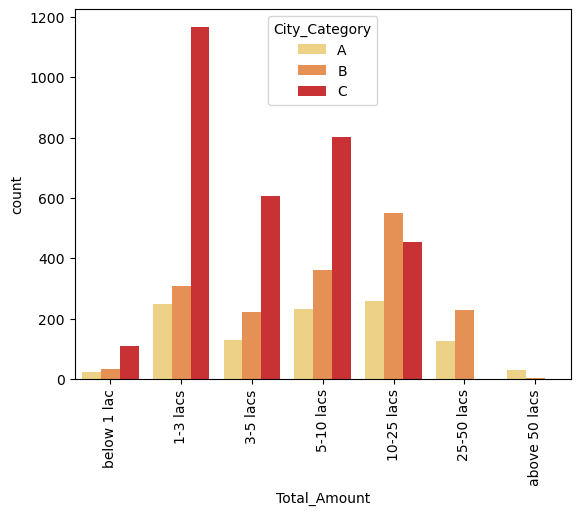

In [47]:
sns.countplot(data=total_amount, x='Total_Amount',hue='City_Category',palette='YlOrRd')
plt.xticks(rotation=90)
plt.show()

- **Most number of customers from city category C has lesser purchase amount**
- **Most customers have spent purchse amount in between 1 lac and 10 lacs**
- **Only city category A & B has spent purchase amount greater than 25 lacs**

### Purchase mean for each gender in different city category

In [48]:
x=purchase.groupby(['City_Category','Gender'])['Purchase'].mean().to_frame('Purchase_Mean').reset_index()
x

,City_Category,Gender,Purchase_Mean
0,A,Female,8516.900287
1,A,Male,8950.114824
2,B,Female,8483.125703
3,B,Male,9287.831201
4,C,Female,9058.245415
5,C,Male,9838.610504


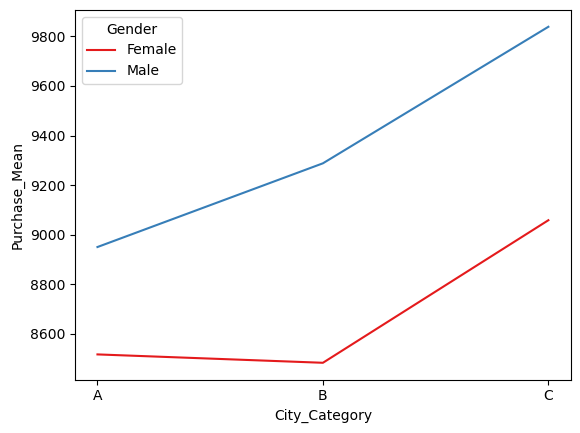

In [49]:
sns.lineplot(data = x, x = 'City_Category', y = 'Purchase_Mean', hue = 'Gender',palette='Set1')
plt.show()

- **The purchase mean is high for male customers in every city than female customers**
- **Purchase mean is higher in city category C compared to other cities**
- **Male customers spend more purchase amount than female customers**

### Relationship between Occupation and the number of purchases

In [50]:
purchase.groupby('Occupation')['Purchase'].count().reset_index().sort_values(by='Purchase',ascending=False).head(10)

,Occupation,Purchase
4,4,72040
0,0,69310
7,7,58875
1,1,47174
17,17,39855
20,20,33355
12,12,30995
14,14,27173
2,2,26435
16,16,25251


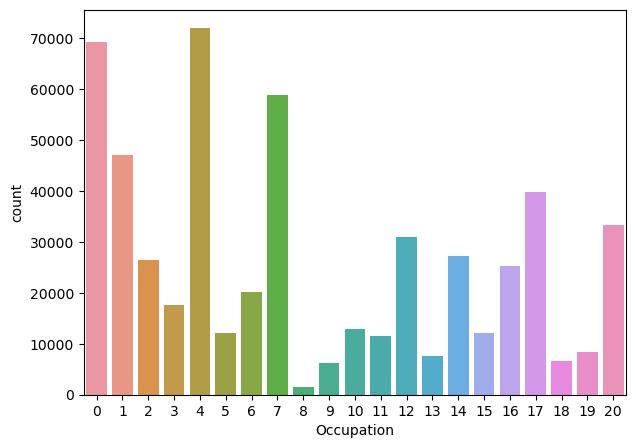

In [51]:
plt.figure(figsize=(7,5))
sns.countplot(data=purchase, x='Occupation')
plt.show()

- **Most number of purchase were made by customers with occupation categories are 4,0,7, 1 and 17**

### Variation of customer purchase based on gender and occupation

In [52]:
purchase.groupby(['Occupation','Gender'])['Purchase'].count().reset_index().head(10)

,Occupation,Gender,Purchase
0,0,Female,18001
1,0,Male,51309
2,1,Female,17896
3,1,Male,29278
4,2,Female,8595
5,2,Male,17840
6,3,Female,7888
7,3,Male,9680
8,4,Female,17788
9,4,Male,54252


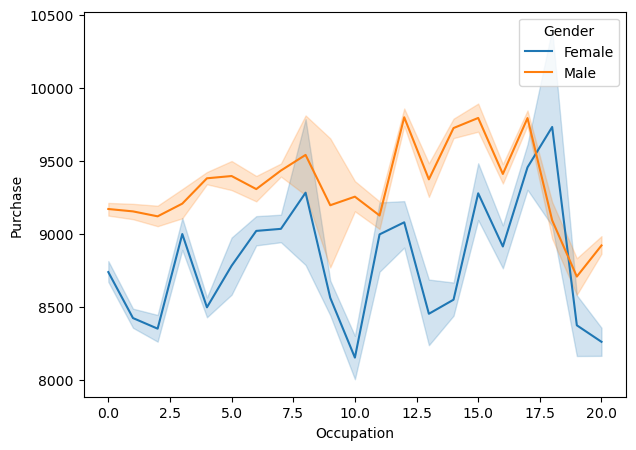

In [129]:
plt.figure(figsize=(7,5))
sns.lineplot(data=purchase, x='Occupation',y='Purchase',hue='Gender')
plt.show()

- **Male customers purchase more than female customer across the dataset for different occupations**

### Gender classification for the total population 

In [54]:
df1.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
Male,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


Text(0.5, 1.0, 'Total purchase amount and gender')

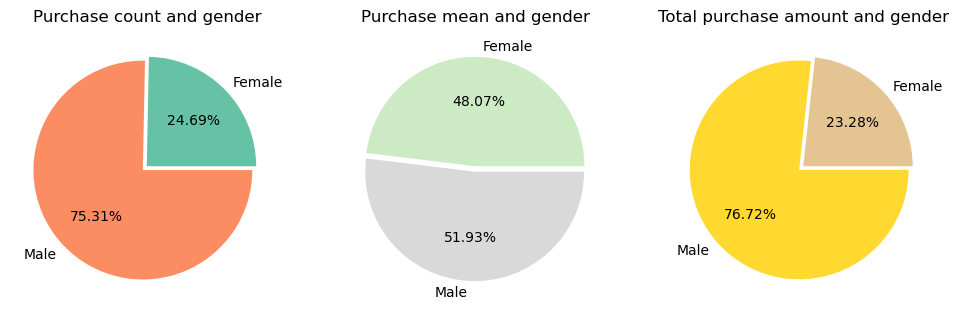

In [55]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

palette_color = sns.color_palette('Set2')
axs[0].pie(x=df.groupby('Gender')['User_ID'].count(), autopct='%0.2f%%', colors=palette_color, labels=['Female','Male'], explode=(0,0.05))
axs[0].set_title("Purchase count and gender")

palette_color = sns.color_palette('Set3_r')
axs[1].pie(x=df1.groupby('Gender')['Purchase'].mean(), autopct='%.2f%%', colors=palette_color, labels=['Female','Male'], explode=(0,0.05))
axs[1].set_title("Purchase mean and gender")

palette_color = sns.color_palette('Set2_r')
axs[2].pie(x=df1.groupby('Gender')['Purchase'].sum(), autopct='%.2f%%', colors=palette_color, labels=['Female','Male'], explode=(0,0.05))
axs[2].set_title("Total purchase amount and gender")


- **More than 75 % of the customers are male and the remaining customers around 25 % are female**
- **However the average total purchase amount spent by both male and female customers are almost the same**
- **Total purchase amount spent by the male customers are significantly higher than female customers**

Text(0.5, 1.0, 'Total purchase amount and marital status')

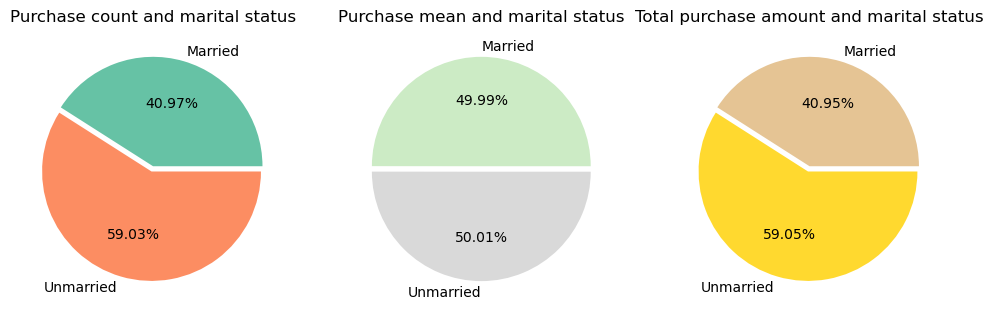

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

palette_color = sns.color_palette('Set2')
axs[0].pie(x=df.groupby('Marital_Status')['User_ID'].count(), autopct='%0.2f%%', colors=palette_color, labels=['Married','Unmarried'], explode=(0,0.05))
axs[0].set_title("Purchase count and marital status")

palette_color = sns.color_palette('Set3_r')
axs[1].pie(x=df1.groupby('Marital_Status')['Purchase'].mean(), autopct='%.2f%%', colors=palette_color, labels=['Married','Unmarried'], explode=(0,0.05))
axs[1].set_title("Purchase mean and marital status")

palette_color = sns.color_palette('Set2_r')
axs[2].pie(x=df1.groupby('Marital_Status')['Purchase'].sum(), autopct='%.2f%%', colors=palette_color, labels=['Married','Unmarried'], explode=(0,0.05))
axs[2].set_title("Total purchase amount and marital status")

- **Umarried customers are who visit walmart are higher than married customers**
- **Average Purchase amount of both married and unmarried customers are equal**
- **Total purchase amount spent by the unmarried customers are higher than married customers**

## Central limit theorem & Confidence interval

### Population Purchase

### Use sample average to find out the interval of the population purchase

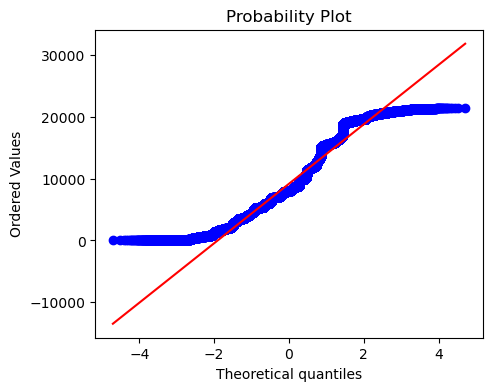

In [57]:
plt.figure(figsize=(5,4))
probplot(purchase['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the population purchase**

#### Bootstrap Sampling

In [58]:
purchase_boot_mean = []
sample_size = 25000
for i in range(5000):
    s=resample(purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    purchase_boot_mean.append(m)

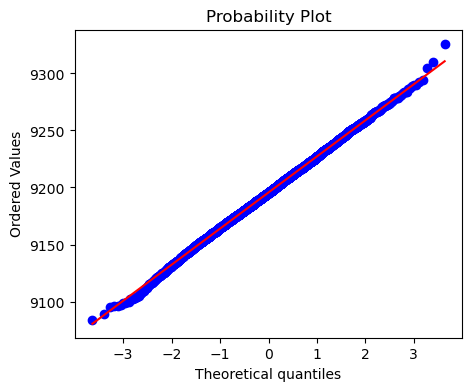

In [59]:
plt.figure(figsize=(5,4))
probplot(purchase_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for population purchase**

[]

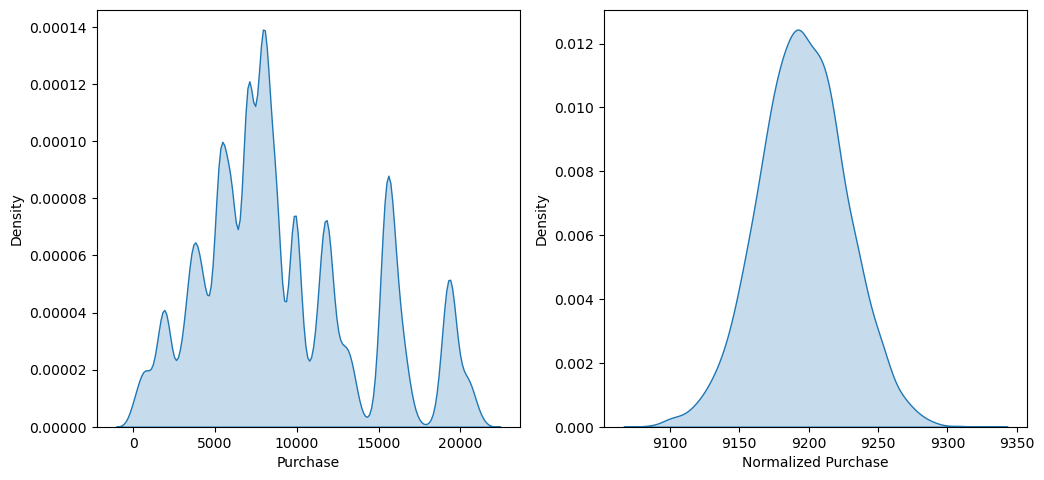

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(purchase.Purchase,fill=True,ax=axes[0])
sns.kdeplot(purchase_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for population purchase is normalized**

In [61]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9143.773622 and 9248.377592 

95% chance to occur between intervals 9132.84456 and 9257.081376 

99% chance to occur between intervals 9110.516838200001 and 9276.670435 



**Confidence Interval** 
- **there is** ***90%*** **chance for population purchase to occur between intervals** ***[9143.77, 9248.37]***
- **there is** ***95%*** **chance for population purchase to occur between intervals** ***[9132.84, 9257.08]***
- **there is** ***99%*** **chance for population purchase to occur between intervals** ***[9110.51, 9276.67]***

### Male Customers

### Use sample average to find out the interval of the population purchase for Male customers

In [62]:
male_purchase=purchase[purchase['Gender']=='Male']

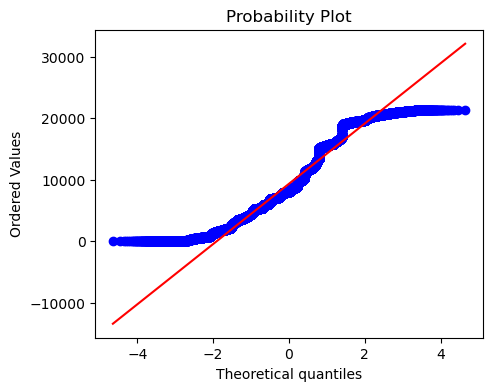

In [63]:
plt.figure(figsize=(5,4))
probplot(male_purchase['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the male population purchase**

#### Bootstrap Sampling

In [64]:
male_purchase_boot_mean = []
sample_size = 25000
for i in range(5000):
    s=resample(male_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    male_purchase_boot_mean.append(m)

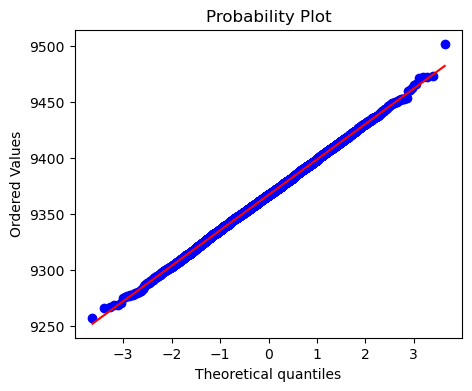

In [65]:
plt.figure(figsize=(5,4))
probplot(male_purchase_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for male population purchase**

[]

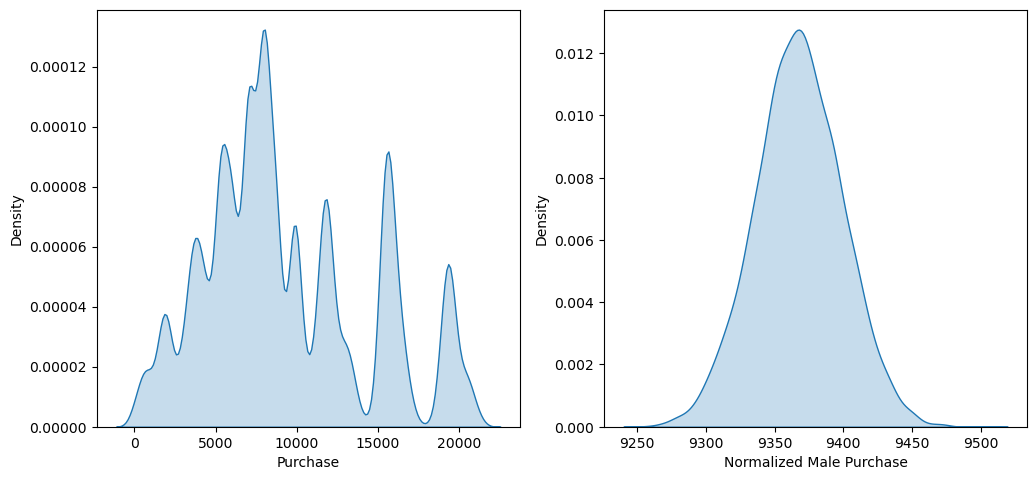

In [66]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(male_purchase.Purchase,fill=True,ax=axes[0])
sns.kdeplot(male_purchase_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Male Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for male population purchase is normalized**

In [67]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(male_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9314.433368 and 9419.401916 

95% chance to occur between intervals 9304.736177 and 9429.910945000001 

99% chance to occur between intervals 9286.2293922 and 9449.4399226 



**Confidence Interval** 
- **there is** ***90%*** **chance for male population purchase to occur between intervals** ***[9314.43, 9419.40]***
- **there is** ***95%*** **chance for male population purchase to occur between intervals** ***[9304.73, 9429.91]***
- **there is** ***99%*** **chance for male population purchase to occur between intervals** ***[9286.22, 9449.43]***

### Tracking the amount spent per purchase for 50 million male customers

In [68]:
x=50000000
#The interval for 90% of the amount per purchase happens is [9110.97, 9617.71]
y90=[9110.97, 9617.71]
#The interval for 95% of the amount per purchase happens is [9067.56, 9657.33]
y95=[9067.56, 9657.33]
#The interval for 99% of the amount per purchase happens is [9115.95, 9272.21]
y99=[9000.33, 9741.66]

#The amount spent for purchase by 50 million customers for each confidence intervals
x90=x*np.array(y90)
print (x90)
x95=x*np.array(y95)
print (x95)
x99=x*np.array(y99)
print (x99)

[4.555485e+11 4.808855e+11]
[4.533780e+11 4.828665e+11]
[4.500165e+11 4.870830e+11]


**The total amount spent for purchase by 50 million male customers within**
- 90% confidence interval is **[455.54, 480.88]** billion dollars
- 95% confidence interval is **[453.37, 482.86]** billion dollars
- 99% confidence interval is **[450.02, 487.08]** billion dollars

### Female Customers

### Use sample average to find out the interval of the population purchase for Female customers

In [69]:
female_purchase=purchase[purchase['Gender']=='Female']

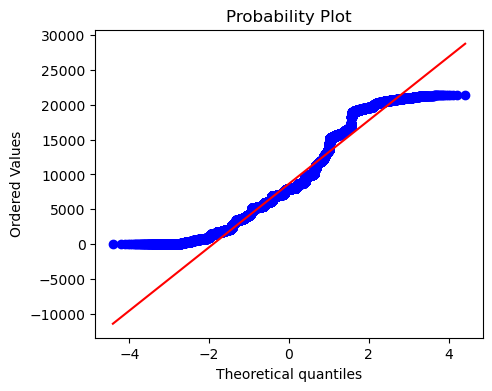

In [70]:
plt.figure(figsize=(5,4))
probplot(female_purchase['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the female population purchase**

#### Bootstrap Sampling

In [71]:
female_purchase_boot_mean = []
sample_size = 25000
for i in range(5000):
    s=resample(female_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    female_purchase_boot_mean.append(m)

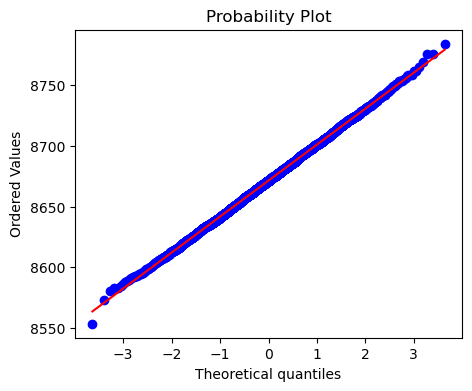

In [72]:
plt.figure(figsize=(5,4))
probplot(female_purchase_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for female population purchase**

[]

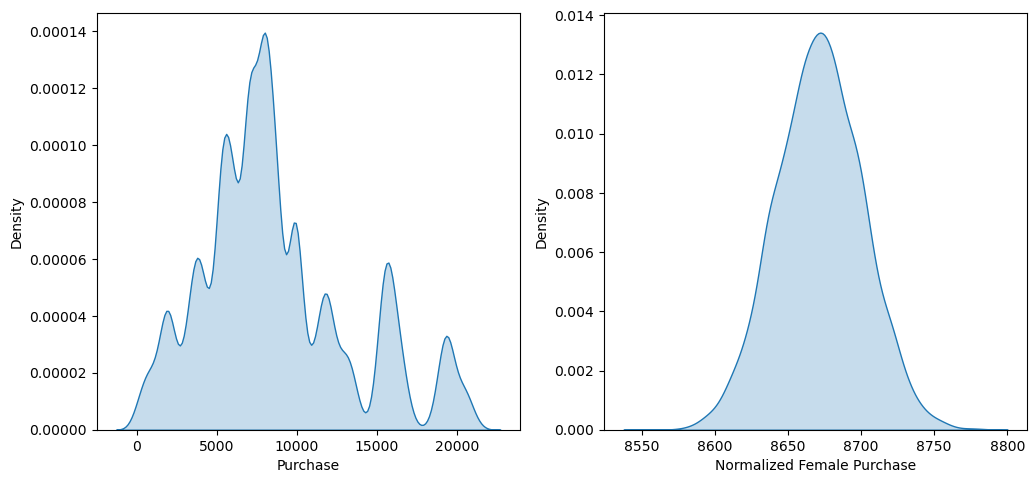

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(female_purchase.Purchase,fill=True,ax=axes[0])
sns.kdeplot(female_purchase_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Female Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for female population purchase is normalized**

In [74]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(female_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 8622.879588000002 and 8720.784526 

95% chance to occur between intervals 8613.437738999999 and 8729.163853 

99% chance to occur between intervals 8596.5567998 and 8748.9478276 



**Confidence Interval** 
- **there is** ***90%*** **chance for female population purchase to occur between intervals** ***[8622.87, 8720.78]***
- **there is** ***95%*** **chance for female population purchase to occur between intervals** ***[8613.43, 8729.16]***
- **there is** ***99%*** **chance for female population purchase to occur between intervals** ***[8596.55, 8748.94]***

### Tracking the amount spent per purchase for 50 million female customers

In [75]:
x=50000000
#The interval for 90% of the amount per purchase happens is [8432.95, 8894.07]
y90=[8432.95, 8894.07]
#The interval for 95% of the amount per purchase happens is [8373.42, 8933.76]
y95=[8373.42, 8933.76]
#The interval for 99% of the amount per purchase happens is  [8279.94, 9037.16]
y99=[8279.94, 9037.16]

#The amount spent for purchase by 50 million customers for each confidence intervals
x90=x*np.array(y90)
print (x90)
x95=x*np.array(y95)
print (x95)
x99=x*np.array(y99)
print (x99)

[4.216475e+11 4.447035e+11]
[4.18671e+11 4.46688e+11]
[4.13997e+11 4.51858e+11]


**The total amount spent for purchase by 50 million female customers within**
- 90% confidence interval is **[421.64, 444.70]** billion dollars
- 95% confidence interval is **[418.67, 446.68]** billion dollars
- 99% confidence interval is **[413.99, 451.85]** billion dollars

**Comparing the distribution for male and female population purchase**

[]

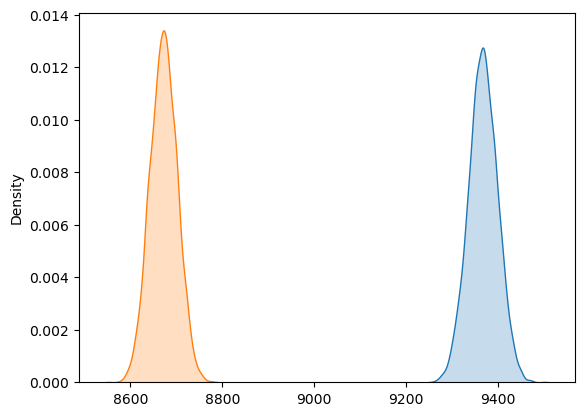

In [76]:
sns.kdeplot(male_purchase_boot_mean,fill=True)
sns.kdeplot(female_purchase_boot_mean,fill=True)
plt.plot()

**We can observe that normal distributions of purchase for both male and female customers is not overlapping for the sample size studied**

### Changing sample size to check whether it has any effect on the width of the distribution

**Male population sampling with smaller sample size**

In [77]:
male_purchase_boot_mean = []
sample_size = 1000
for i in range(1000):
    s=resample(male_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    male_purchase_boot_mean.append(m)

In [78]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(male_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9104.489350000002 and 9615.8491 

95% chance to occur between intervals 9067.80655 and 9668.121775 

99% chance to occur between intervals 8943.577355 and 9731.79848 



**Female population sampling with smaller sample size**

In [79]:
female_purchase_boot_mean = []
sample_size = 1000
for i in range(1000):
    s=resample(female_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    female_purchase_boot_mean.append(m)

In [80]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(female_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 8421.188400000001 and 8925.24895 

95% chance to occur between intervals 8383.292075000001 and 8984.39115 

99% chance to occur between intervals 8309.14285 and 9083.941725 



[]

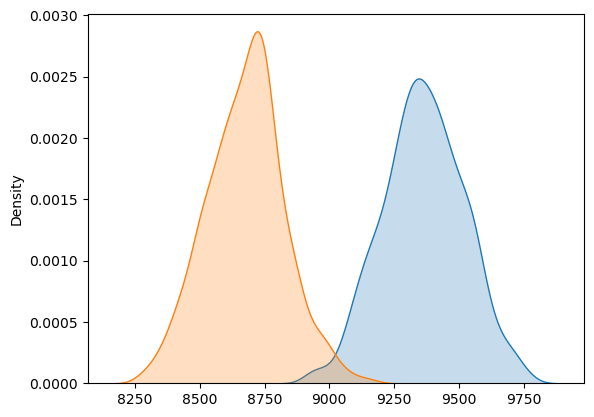

In [81]:
sns.kdeplot(male_purchase_boot_mean,fill=True)
sns.kdeplot(female_purchase_boot_mean,fill=True)
plt.plot()

**Confidence Interval** 
- **there is** ***99%*** **chance for male population purchase to occur between intervals** ***[9000.33, 9741.66]***
- **there is** ***99%*** **chance for female population purchase to occur between intervals** ***[8279.94, 9037.16]***

- **We can see that when we reduce the sample size to 1000, there is some overlapping of distribution at confidence intervel of 99%**
- **We can conclude that for decrease in sample size, width of the distribution increses and tend to overlap at different confidence levels**

### Married Customers

### Use sample average to find out the interval of the population purchase for Married customers

In [82]:
married_purchase=purchase[purchase['Marital_Status']=='Married']

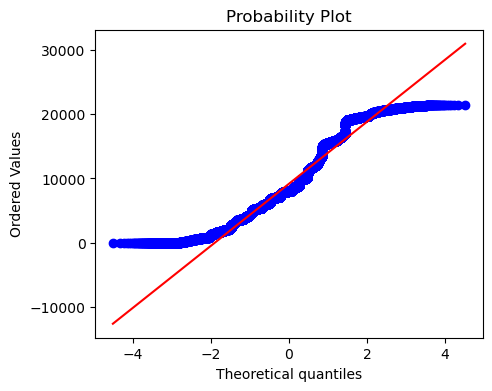

In [83]:
plt.figure(figsize=(5,4))
probplot(married_purchase['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the married customer population purchase**

#### Bootstrap Sampling

In [200]:
married_purchase_boot_mean = []
sample_size = 250000
for i in range(5000):
    s=resample(married_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    married_purchase_boot_mean.append(m)

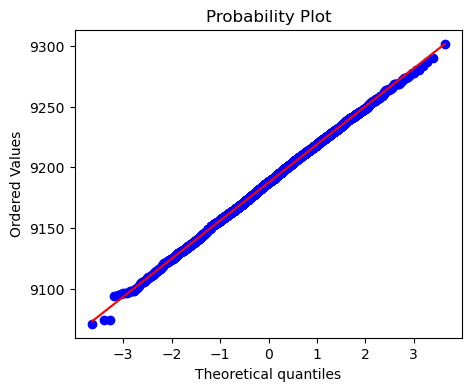

In [85]:
plt.figure(figsize=(5,4))
probplot(married_purchase_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for married customer population purchase**

[]

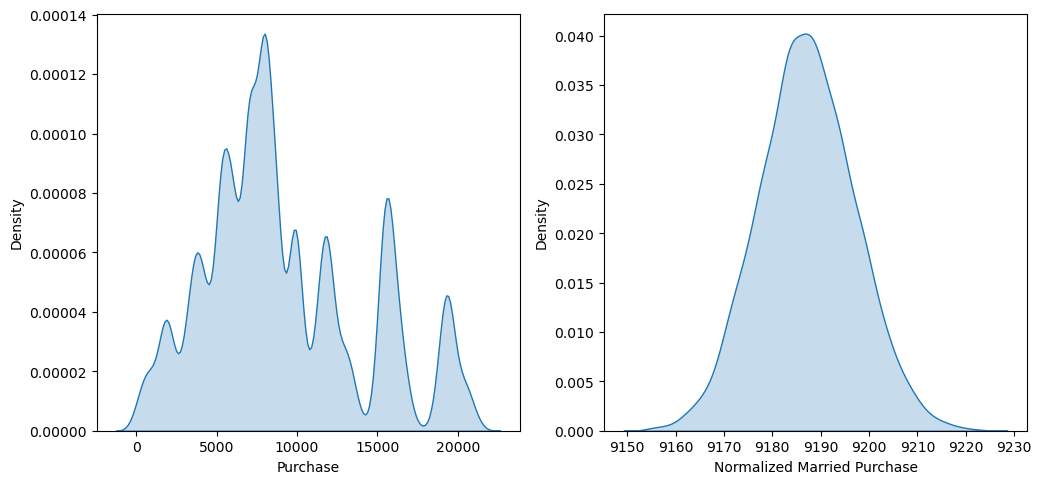

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(married_purchase.Purchase,fill=True,ax=axes[0])
sns.kdeplot(married_purchase_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Married Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for married customer population purchase is normalized**

In [87]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(married_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9135.210588 and 9239.07985 

95% chance to occur between intervals 9125.325363 and 9247.42612 

99% chance to occur between intervals 9105.9383552 and 9267.195403 



**Confidence Interval** 
- **there is** ***90%*** **chance for married population purchase to occur between intervals** ***[9135.22, 9239.07]***
- **there is** ***95%*** **chance for married population purchase to occur between intervals** ***[9125.32, 9247.42]***
- **there is** ***99%*** **chance for married population purchase to occur between intervals** ***[9105.33, 9267.19]***

### Unmarried Customers

### Use sample average to find out the interval of the population purchase for Unmarried customers

In [88]:
Unmarried_purchase=purchase[purchase['Marital_Status']=='Unmarried']

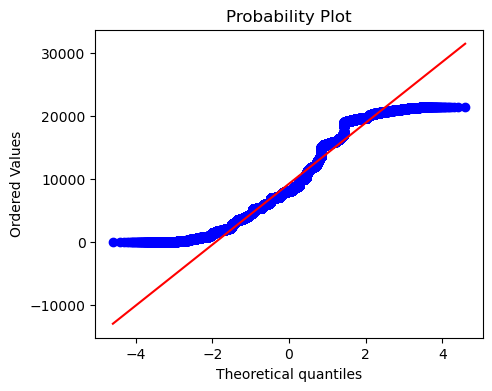

In [89]:
plt.figure(figsize=(5,4))
probplot(Unmarried_purchase['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the unmarried customer population purchase**

#### Bootstrap Sampling

In [199]:
Unmarried_purchase_boot_mean = []
sample_size = 250000
for i in range(5000):
    s=resample(Unmarried_purchase['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    Unmarried_purchase_boot_mean.append(m)

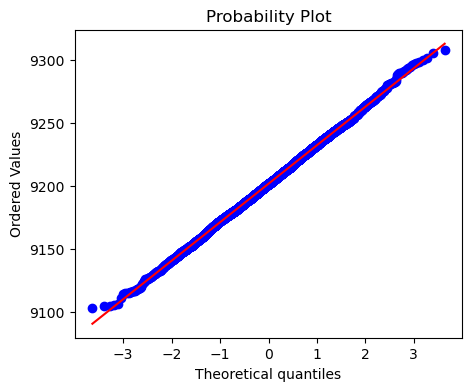

In [91]:
plt.figure(figsize=(5,4))
probplot(Unmarried_purchase_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for unmarried customer population purchase**

[]

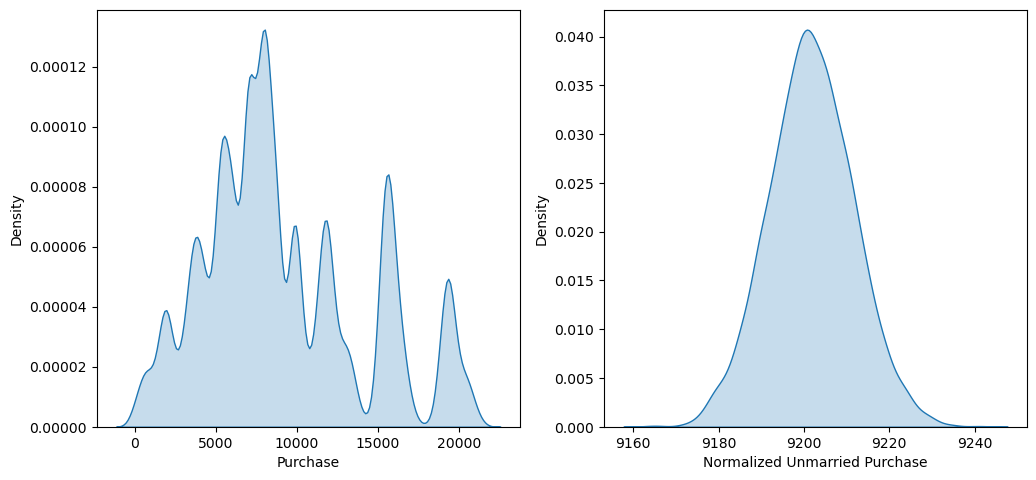

In [202]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(Unmarried_purchase.Purchase,fill=True,ax=axes[0])
sns.kdeplot(Unmarried_purchase_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for unmarried customer population purchase is normalized**

In [93]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(Unmarried_purchase_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9151.50446 and 9250.746548 

95% chance to occur between intervals 9141.993005 and 9262.049738000002 

99% chance to occur between intervals 9124.8685988 and 9281.6871756 



**Confidence Interval** 
- **there is** ***90%*** **chance for unmarried population purchase to occur between intervals** ***[9151.50, 9250.74]***
- **there is** ***95%*** **chance for unmarried population purchase to occur between intervals** ***[9141.99, 9262.04]***
- **there is** ***99%*** **chance for unmarried population purchase to occur between intervals** ***[9124.86, 9281.68]***

[]

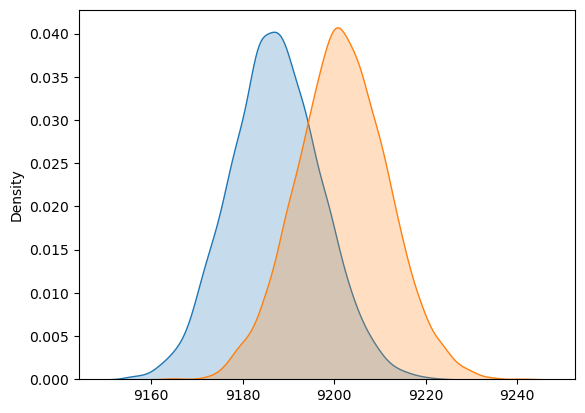

In [203]:
sns.kdeplot(married_purchase_boot_mean,fill=True)
sns.kdeplot(Unmarried_purchase_boot_mean,fill=True)
plt.plot()

**From the values obtained for the three confidence intervels of both married and unmarried distributions, we can clearly observe that they are intersecting each cases. So the distributions does overlap**

### Age group from 0 to 17

### Use sample average to find the interval of the population purchase for customers within age group 0 to 17

In [95]:
age_0_to_17=purchase[purchase['Age']=='0-17']

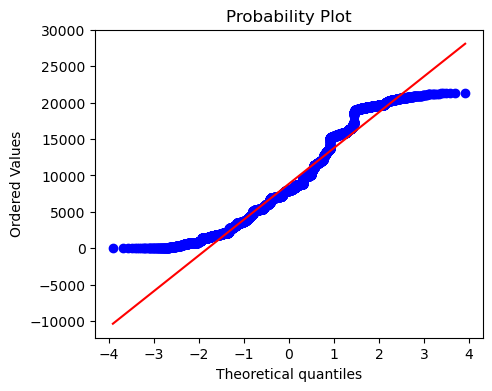

In [96]:
plt.figure(figsize=(5,4))
probplot(age_0_to_17['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the customer population purchase within age group of 0 to 17**

#### Bootstrap Sampling

In [97]:
age_0_to_17_boot_mean = []
sample_size = 5000
for i in range(1000):
    s=resample(age_0_to_17['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    age_0_to_17_boot_mean.append(m)

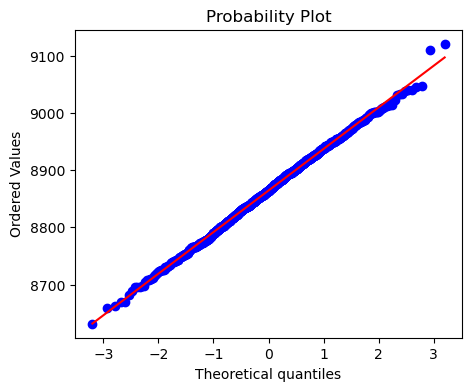

In [98]:
plt.figure(figsize=(5,4))
probplot(age_0_to_17_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for customer population purchase within age group of 0 to 17**

[]

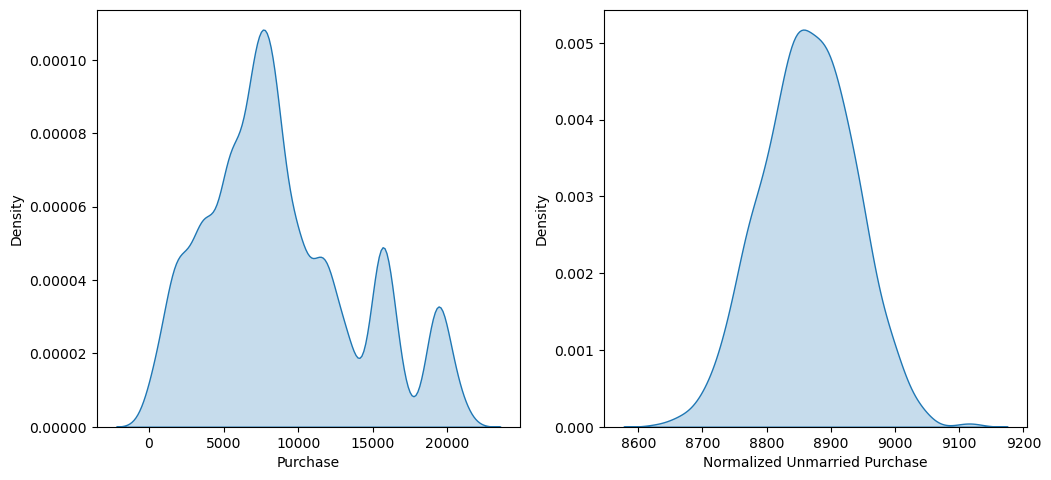

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(age_0_to_17.Purchase,fill=True,ax=axes[0])
sns.kdeplot(age_0_to_17_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for customer population within age group 0 to 17 is normalized**

In [100]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(age_0_to_17_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 8743.19304 and 8982.805260000001 

95% chance to occur between intervals 8724.659024999999 and 9001.524360000001 

99% chance to occur between intervals 8682.063317 and 9039.720016 



**Confidence Interval** 
- **there is** ***90%*** **chance for customer population purchase with age group 0 to 17, to occur between intervals** ***[8743.19, 8982.80]***
- **there is** ***95%*** **chance for customer population purchase with age group 0 to 17, to occur between intervals** ***[8724.65, 9001.52]***
- **there is** ***99%*** **chance for customer population purchase with age group 0 to 17, to occur between intervals** ***[8682.06, 9039.72]***

### Age group from 18 to 25

### Use sample average to find the interval of the population purchase for customers within age group 18 to 25

In [101]:
age_18_to_25=purchase[purchase['Age']=='18-25']

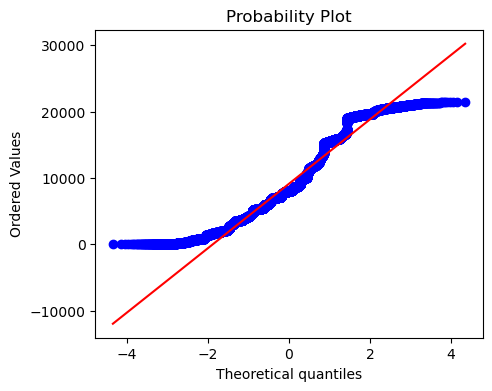

In [102]:
plt.figure(figsize=(5,4))
probplot(age_18_to_25['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the customer population purchase within age group of 18 to 25**

#### Bootstrap Sampling

In [103]:
age_18_to_25_boot_mean = []
sample_size = 5000
for i in range(1000):
    s=resample(age_18_to_25['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    age_18_to_25_boot_mean.append(m)

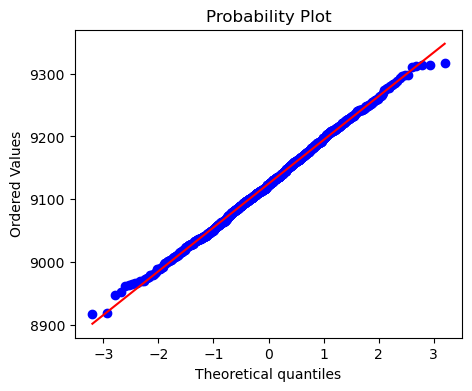

In [104]:
plt.figure(figsize=(5,4))
probplot(age_18_to_25_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for customer population purchase within age group of 18 to 25**

[]

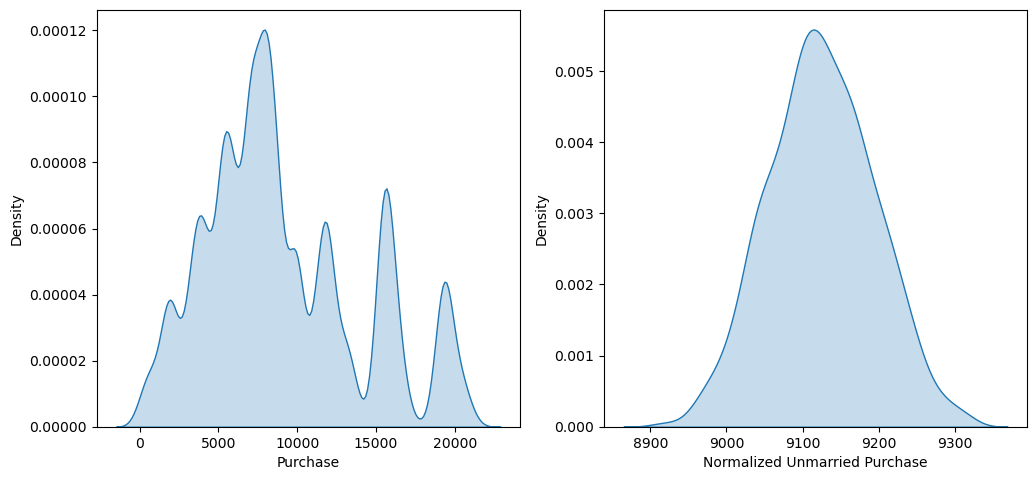

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(age_18_to_25.Purchase,fill=True,ax=axes[0])
sns.kdeplot(age_18_to_25_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for customer population within age group 18 to 25 is normalized**

In [106]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(age_18_to_25_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9011.50027 and 9240.58982 

95% chance to occur between intervals 8991.097170000001 and 9258.781415000001 

99% chance to occur between intervals 8963.255347 and 9298.629778 



**Confidence Interval** 
- **there is** ***90%*** **chance for customer population purchase with age group 18 to 25, to occur between intervals** ***[9011.50, 9240.58]***
- **there is** ***95%*** **chance for customer population purchase with age group 18 to 25, to occur between intervals** ***[8991.09, 9258.78]***
- **there is** ***99%*** **chance for customer population purchase with age group 18 to 25, to occur between intervals** ***[8963.25, 9298.62]***

### Age group from 26 to 35

### Use sample average to find the interval of the population purchase for customers within age group 26 to 35

In [107]:
age_26_to_35=purchase[purchase['Age']=='26-35']

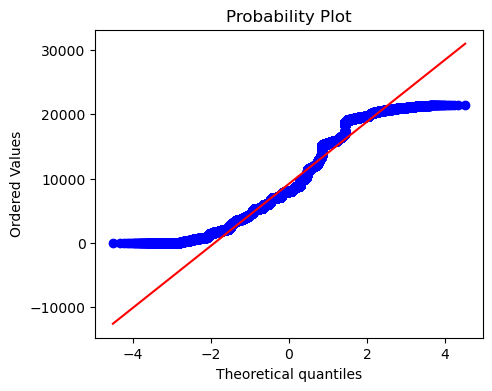

In [108]:
plt.figure(figsize=(5,4))
probplot(age_26_to_35['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the customer population purchase within age group of 26 to 35**

#### Bootstrap Sampling

In [109]:
age_26_to_35_boot_mean = []
sample_size = 5000
for i in range(1000):
    s=resample(age_26_to_35['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    age_26_to_35_boot_mean.append(m)

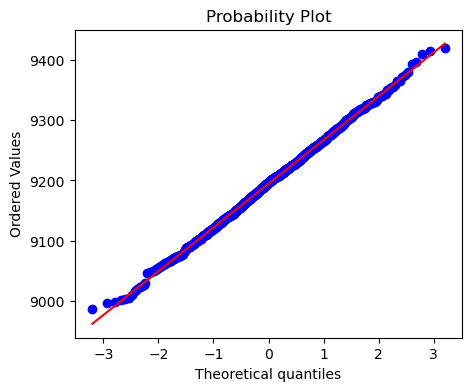

In [110]:
plt.figure(figsize=(5,4))
probplot(age_26_to_35_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for customer population purchase within age group of 26 to 35**

[]

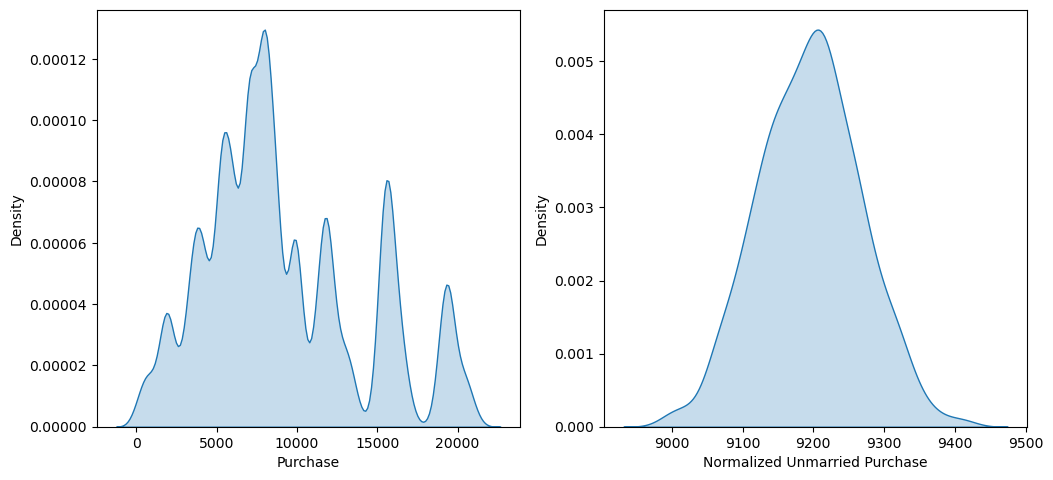

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(age_26_to_35.Purchase,fill=True,ax=axes[0])
sns.kdeplot(age_26_to_35_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for customer population within age group 26 to 35 is normalized**

In [112]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(age_26_to_35_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9073.82667 and 9315.70803 

95% chance to occur between intervals 9058.248685 and 9331.312495 

99% chance to occur between intervals 9005.82228 and 9380.347056 



**Confidence Interval** 
- **there is** ***90%*** **chance for customer population purchase with age group 26 to 35, to occur between intervals** ***[9073.82, 9315.70]***
- **there is** ***95%*** **chance for customer population purchase with age group 26 to 35, to occur between intervals** ***[9058.24, 9331.31]***
- **there is** ***99%*** **chance for customer population purchase with age group 26 to 35, to occur between intervals** ***[9005.82, 9380.34]***

### Age group from 36 to 50

### Use sample average to find the interval of the population purchase for customers within age group 36 to 50

In [113]:
age_36_to_50=purchase[(purchase['Age']=='36-45')|(purchase['Age']=='46-50')]

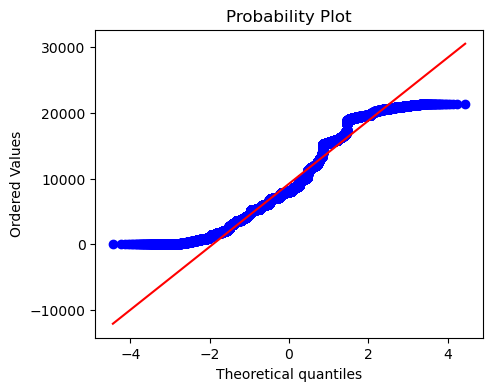

In [114]:
plt.figure(figsize=(5,4))
probplot(age_36_to_50['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the customer population purchase within age group of 36 to 50**

#### Bootstrap Sampling

In [115]:
age_36_to_50_boot_mean = []
sample_size = 5000
for i in range(1000):
    s=resample(age_36_to_50['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    age_36_to_50_boot_mean.append(m)

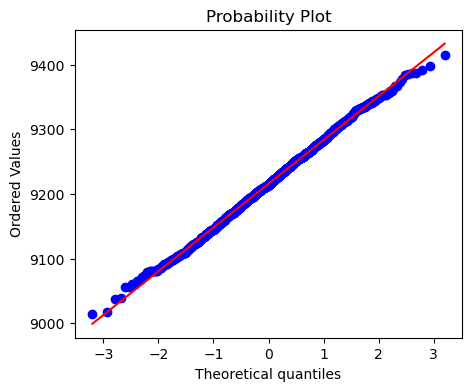

In [116]:
plt.figure(figsize=(5,4))
probplot(age_36_to_50_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for customer population purchase within age group of 36 to 50**

[]

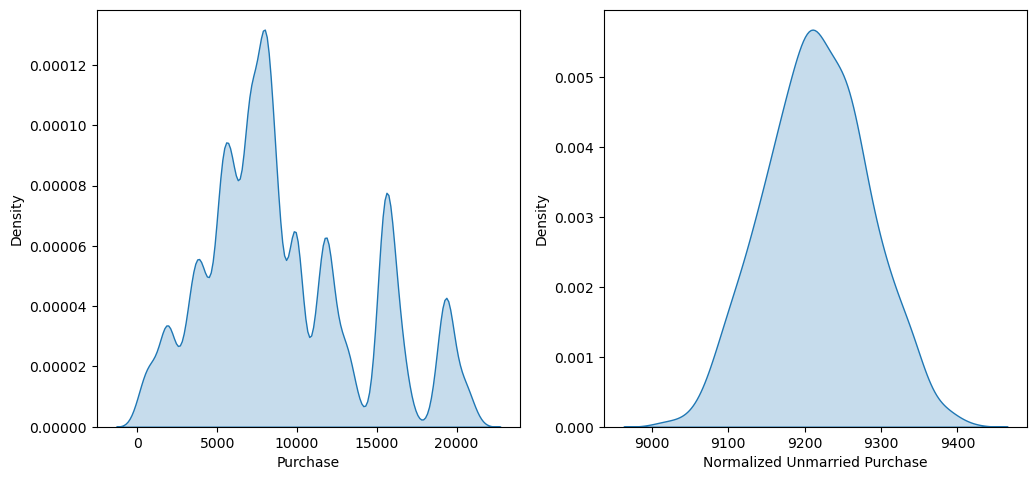

In [117]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(age_36_to_50.Purchase,fill=True,ax=axes[0])
sns.kdeplot(age_36_to_50_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for customer population within age group 36 to 50 is normalized**

In [118]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(age_36_to_50_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9103.94461 and 9331.37039 

95% chance to occur between intervals 9084.97676 and 9346.344889999998 

99% chance to occur between intervals 9056.601303 and 9385.900861999999 



**Confidence Interval** 
- **there is** ***90%*** **chance for customer population purchase with age group 36 to 50, to occur between intervals** ***[9103.94, 9331.37]***
- **there is** ***95%*** **chance for customer population purchase with age group 36 to 50, to occur between intervals** ***[9084.97, 9346.34]***
- **there is** ***99%*** **chance for customer population purchase with age group 36 to 50, to occur between intervals** ***[9056.60, 9385.90]***

### Age above 51

### Use sample average to find the interval of the population purchase for customers with age above 51

In [119]:
age_above_51=purchase[(purchase['Age']=='51-55')|(purchase['Age']=='55+')]

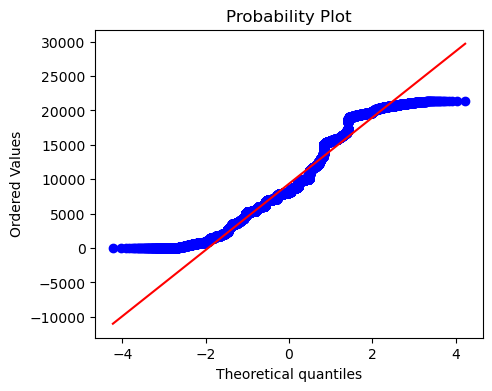

In [120]:
plt.figure(figsize=(5,4))
probplot(age_above_51['Purchase'],plot=plt)
plt.show()

**It does not follow normal distribution. Doing bootstrap sampling to find sample average of the customer population purchase with age above 51**

#### Bootstrap Sampling

In [121]:
age_above_51_boot_mean = []
sample_size = 5000
for i in range(1000):
    s=resample(age_above_51['Purchase'],n_samples=sample_size)
    m=np.mean(s)
    age_above_51_boot_mean.append(m)

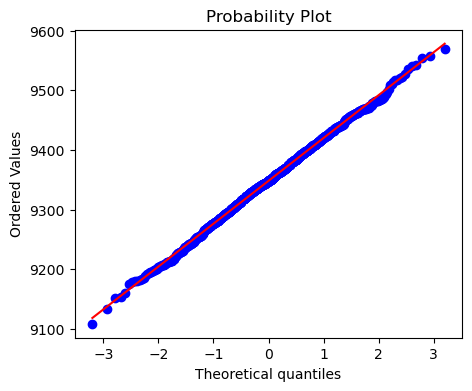

In [122]:
plt.figure(figsize=(5,4))
probplot(age_above_51_boot_mean,plot=plt)
plt.show()

**The sample average is found via bootstrap sampling and the means follow normal distribution for customer population purchase with age above 51**

[]

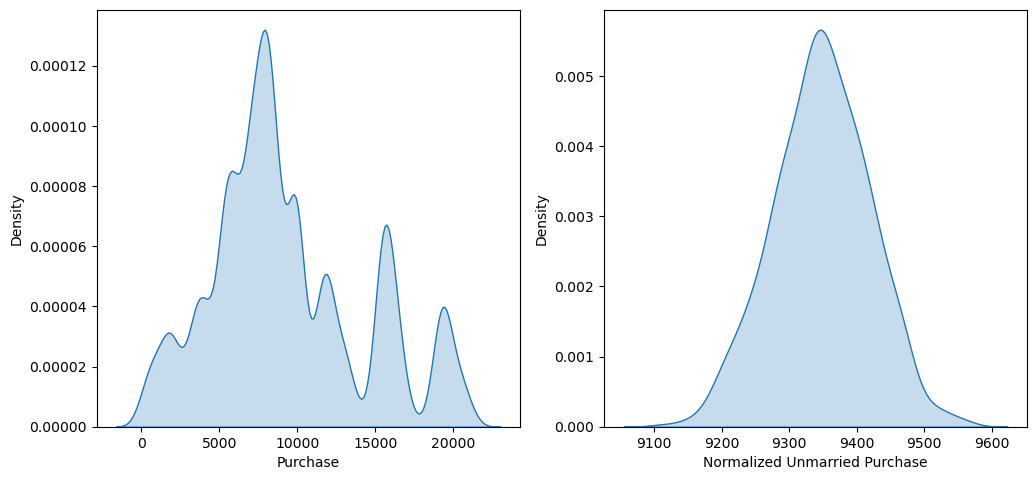

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.subplots_adjust(top=1.5)
sns.kdeplot(age_above_51.Purchase,fill=True,ax=axes[0])
sns.kdeplot(age_above_51_boot_mean,fill=True,ax=axes[1])
axes[1].set_xlabel('Normalized Unmarried Purchase') 
plt.plot()

**By** ***central limit theorem,*** **the distribution for customer population with age above 51 is normalized**

In [124]:
confidence = [90,95,99]
for i in range(3):
    diff = (100-confidence[i])
    lower = diff/2
    upper = confidence[i] + (diff/2)
    x=np.percentile(age_above_51_boot_mean,[lower,upper])
    print(f'{confidence[i]}% chance to occur between intervals {x[0]} and {x[1]} \n')

90% chance to occur between intervals 9227.08767 and 9464.628560000001 

95% chance to occur between intervals 9205.829445000001 and 9481.581995 

99% chance to occur between intervals 9174.585771 and 9535.72172 



**Confidence Interval** 
- **there is** ***90%*** **chance for customer population purchase with age above 51, to occur between intervals** ***[9227.08, 9464.62]***
- **there is** ***95%*** **chance for customer population purchase with age above 51, to occur between intervals** ***[9205.82, 9481.58]***
- **there is** ***99%*** **chance for customer population purchase with age above 51, to occur between intervals** ***[9174.58, 9535.72]***

[]

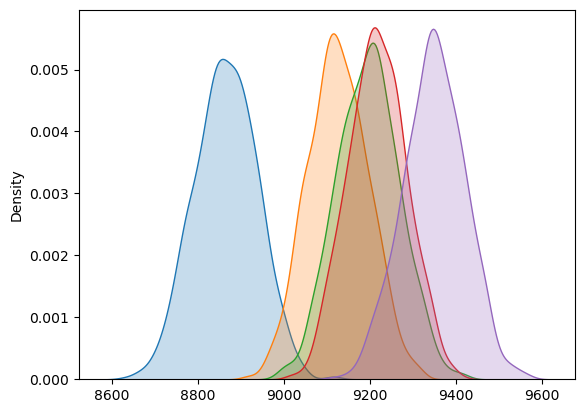

In [125]:
sns.kdeplot(age_0_to_17_boot_mean,fill=True)
sns.kdeplot(age_18_to_25_boot_mean,fill=True)
sns.kdeplot(age_26_to_35_boot_mean,fill=True)
sns.kdeplot(age_36_to_50_boot_mean,fill=True)
sns.kdeplot(age_above_51_boot_mean,fill=True)
plt.plot()

**By observing the confidence intervel from distributions of customer purchase, it can be seen that the intervals for different age groups are clearly overlapping each other**

## Insights and Recommendations

- Men spent more money than women, So company should focus on retaining the male customers and getting more male customers.
- Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.
- Product_Category - 1, 5, 8, & 11 have highest purchasing frequency. This means these are the products in these categories are liked more by customers. Company can focus on selling more of these products or selling more of the products which are purchased less.
- Male customers living in City_Category C spend more money than other male customers living in B or C, so Selling more products in the City_Category C will help the company increase the revenue.
- Customers in the age 18to 45 spend more money than the others, So company should focus on acquisition of customers within the age 18-45.
- The purchase mean for both male and female increased along with their stay back in current city.
- Most of the customers have total purchase amount between 1 to 10 lacs. Also total purchase amount of most customers from city category C is lower compared to other cities.
- Only city category A & B has spent purchase amount greater than 25 lacs. Also the total number of purchases is higher in cities with lower total purchase amount. Almost all product catogeries in city C has high purchase amount.
- Most number of purchase were made by customers with occupation categories are 4, 0 and 7 and customers with occupation 18, 9, 8 have purchased the least. These people are important for growing the business.
- Top 5 most amount purchased users are 1004277, 1001680, 1002909, 1001941 and 1000424. Give discounts/gifts/coupons for customers to improve the customer relationship, also consider top purchasing products in each cities
- Umarried customers are who visit walmart are higher than married customers. Average Purchase amount of both married and unmarried customers are almost equal
- Male customers purchase more than female customer across the dataset for different occupations.
- More than 75 % of the customers are male and the remaining customers around 25 % are female, however the average total purchase amount spent by both male and female customers are almost the same.
- When sample size is reduced while taking sample mean, the width of the distribution increases and the chance of overlapping curves at various confidence interval increases.
- If two statistics have non-overlapping confidence intervals, they are necessarily significantly different. But, if they have overlapping confidence intervals, it is not necessarily true that they are not significantly different.
- From the given dataset, confidence interval per customer purchase is observed using central limit theorem. It is then tracked to study the characteristics of a population with 50 million both male and female customers.
- Some of the distributions overlapped for different age groups, that means customers purchase products regardless of their age groups in some cases.